## FLIP ROBO TECHNOLOGIES, BENGALURU
### <b> Evaluation Project 6: Loan Application Status Prediction </b>
<b><em> By: Satya Jyothi </em></b>

<b><em> Batch:  Internship 34  </em></b>

## <b>Problem Statement:</b>

<b><em>This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. </em></b>

#### <b>Independent Variables:</b>

* 1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
* 2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
* 3.Married - This refers to applicant being in a state of matrimony
* 4.Dependents - This refres to persons who depends on the applicants for survival
* 5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
* 6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
* 7.Applicant Income - This refers to disposable income available for the applicant's use under State law.
* 8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
* 9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.
* 10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
* 11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
* 12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
* 13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

* You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

<b>Find the dataset link below.
* https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
# importing required initial libraries
import numpy as np                 # Basic computation library
import pandas as pd                # for data wrangling purpose
import seaborn as sns              # For Visualization
import matplotlib.pyplot as plt    # For Plotting

import warnings
warnings.filterwarnings("ignore")  # Filtering warnings

In [2]:
# Reading csv file
df=pd.read_csv("loan_prediction.csv")
pd.set_option('display.max_columns', None) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 614
No. of Columns : 13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

### Observations: ####
- **There are int,float and object data types available in the dataset**

In [6]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

### Observations :
- **There are 614 rows and 13 columns in the dataset.**
- **Out of 13 columns, there are 8 features with Object datatype and rest are float,int datatypes**
- **The Variable is 'Loan_Status'. As Per probelm statement,  I need to do classificaiton task**

# Data Integrity Check

## Duplicate Values Check

In [7]:
df.duplicated().sum()

0

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


#### Observations: 
- **No duplicate values present in the dataframe**

## Checking for the presense of any non-interpretable values 
- **I am checking all unique values in the dataset for each column and trying to identify any non-interpretable values, so that I can impute them with appropriate technique or I will take a decision to impute or not**
- **This also helps me to identify the empty columns**

In [9]:
# List of columns to compute value counts for

# Initialize an empty DataFrame for the value counts
vc = pd.DataFrame()

# Loop over the columns and compute value counts
for col in df.columns:
    # I am excluding float and int data types because if any non-interpretable value is exists in any column, its datatype will be changed to "object"
    if df[col].dtype in ['float64', 'int64']: 
        continue
    vc_col = df[col].value_counts().to_frame().reset_index().rename(columns={'index': col, col: 'count'})
    # # Considering the values only if the count is > 2 as less than that probably indicates non-categorical feature but it is good to check once all the data by putting threshold of 0
    vc_col = vc_col[vc_col['count'] >= 2] 
    vc = pd.concat([vc, vc_col], axis=1).fillna('')

# Drop the 'count' column from the concatenated DataFrame
vc = vc.drop('count', axis=1)

# Store the final output in a DataFrame
vc_df = pd.DataFrame(vc)

# Display the value counts of the columns side by side
# pd.set_option('display.max_rows', None)
display(vc_df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,,Male,Yes,0,Graduate,No,Semiurban,Y
1,,Female,No,1,Not Graduate,Yes,Urban,N
2,,,,2,,,Rural,
3,,,,3+,,,,


### Observations:
- **There are no non-interpretable values in the dataset**
- **However, I will check for null values in the next step**

## Check Columns with Null Values, Empty Columns, Columns with One Unique Value and No. of Unique Value in each Column

In [10]:
# create an empty dataframe to store the number of unique values for each column
unique_values_df = pd.DataFrame(columns=['Column', 'Data_Type', 'Num_Unique_Values'])

for col in df.columns:
    # count the number of unique values for the current column
    if df[col].notna().any():
        num_unique_values = df[col].nunique()
        data_type = df[col].dtype
    else:
        num_unique_values = 0
        data_type = df[col].dtype
    
    # add the column name, data type and number of unique values to the unique_values_df dataframe
    unique_values_df = unique_values_df.append({'Column': col, 'Data_Type': data_type, 'Num_Unique_Values': num_unique_values}, ignore_index=True)

# print the dataframe showing the number of unique values for each column in the dataset
print("\033[1mNumber of unique values for each column in the dataset:\033[0m")
pd.set_option('display.max_rows', None)
display(unique_values_df)
# ------------------------------------------------------------------------------------------------------------------
# check for columns with only one unique value
unique_vals = df.nunique()
single_val_cols = unique_vals[unique_vals == 1].index
if len(single_val_cols) > 0:
    print("="*125)
    print("The columns with only one unique value: \033[1m'" + "', '".join(single_val_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for empty columns
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("The empty columns are: \033[1m'" + "', '".join(empty_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for NaN values in columns and print in order of data types
nan_cols = df.columns[df.isna().any()]
# separate columns based on their data type
int_cols = [col for col in nan_cols if df[col].dtype == 'int64']
float_cols = [col for col in nan_cols if df[col].dtype == 'float64']
object_cols = [col for col in nan_cols if df[col].dtype == 'object']
other_cols = [col for col in nan_cols if col not in int_cols + float_cols + object_cols]
# ------------------------------------------------------------------------------------------------------------------
# print the columns with NaN values in the order of their data type
if len(nan_cols) > 0:
    print("="*125)
    if len(int_cols) > 0:
        print("\033[1mInt data type columns with NaN values: \033[0m'" + "', '".join(int_cols) + "'")
    if len(float_cols) > 0:
        print("\033[1mFloat data type columns with NaN values: \033[0m'" + "', '".join(float_cols) + "'")
    if len(object_cols) > 0:
        print("\033[1mObject data type columns with NaN values: \033[0m'" + "', '".join(object_cols) + "'")
    if len(other_cols) > 0:
        print("\033[1mOther data type columns with NaN values: \033[0m'" + "', '".join(other_cols) + "'")
    print("="*125)

Number of unique values for each column in the dataset:


,Column,Data_Type,Num_Unique_Values
0,Loan_ID,object,614
1,Gender,object,2
2,Married,object,2
3,Dependents,object,4
4,Education,object,2
5,Self_Employed,object,2
6,ApplicantIncome,int64,505
7,CoapplicantIncome,float64,287
8,LoanAmount,float64,203
9,Loan_Amount_Term,float64,10


Float data type columns with NaN values: 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
Object data type columns with NaN values: 'Gender', 'Married', 'Dependents', 'Self_Employed'


### Observations:
- **There are no empty columns and there are no columns with only one unique value in the dataset**
- **There are 7 columns with null values 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Gender', 'Married', 'Dependents', 'Self_Employed' which I will perform imputation in the next steps**

In [11]:
# Dropping the unnecessary column 'Loan_ID' as it will not have any impact to model learning
df.drop(['Loan_ID'],axis=1,inplace=True)

In [12]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## Enlisting Value Counts - Object Datatype

- **From the below step, I can understand different categories available in categorical data or object data and corresponding %of data in the column. This helps me to understand if any unknown category presents in a particular column. This also helps me to understand whether we have right balanced data in case of categorical features or more data is there only for few classes. Finally, this helps me to take right steps for EDA**

In [13]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 10 
    value_counts_filtered = value_counts[value_counts >= 0]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'int64']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"Gender" unique values with data type "object":


,Gender,count,%count
0,Male,489,79.641694
1,Female,112,18.241042
2,NaN,13,2.117264


"Married" unique values with data type "object":


,Married,count,%count
0,Yes,398,64.820847
1,No,213,34.690554
2,NaN,3,0.488599


"Dependents" unique values with data type "object":


,Dependents,count,%count
0,0,345,56.188925
1,1,102,16.612378
2,2,101,16.449511
3,3+,51,8.306189
4,NaN,15,2.442997


"Education" unique values with data type "object":


,Education,count,%count
0,Graduate,480,78.175896
1,Not Graduate,134,21.824104


"Self_Employed" unique values with data type "object":


,Self_Employed,count,%count
0,No,500,81.433225
1,Yes,82,13.355049
2,NaN,32,5.211726


"Property_Area" unique values with data type "object":


,Property_Area,count,%count
0,Semiurban,233,37.947883
1,Urban,202,32.899023
2,Rural,179,29.153094


"Loan_Status" unique values with data type "object":


,Loan_Status,count,%count
0,Y,422,68.729642
1,N,192,31.270358


### Observations:
- **NaN Values present in Gender,Married,Self_Employed,credit_history columns**
- **Classificaiton target variable "Loan_Status" has 2 categories. Noticed imbalance in the dataset for this column**

### Check for Null Values and Percentage

In [14]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

149

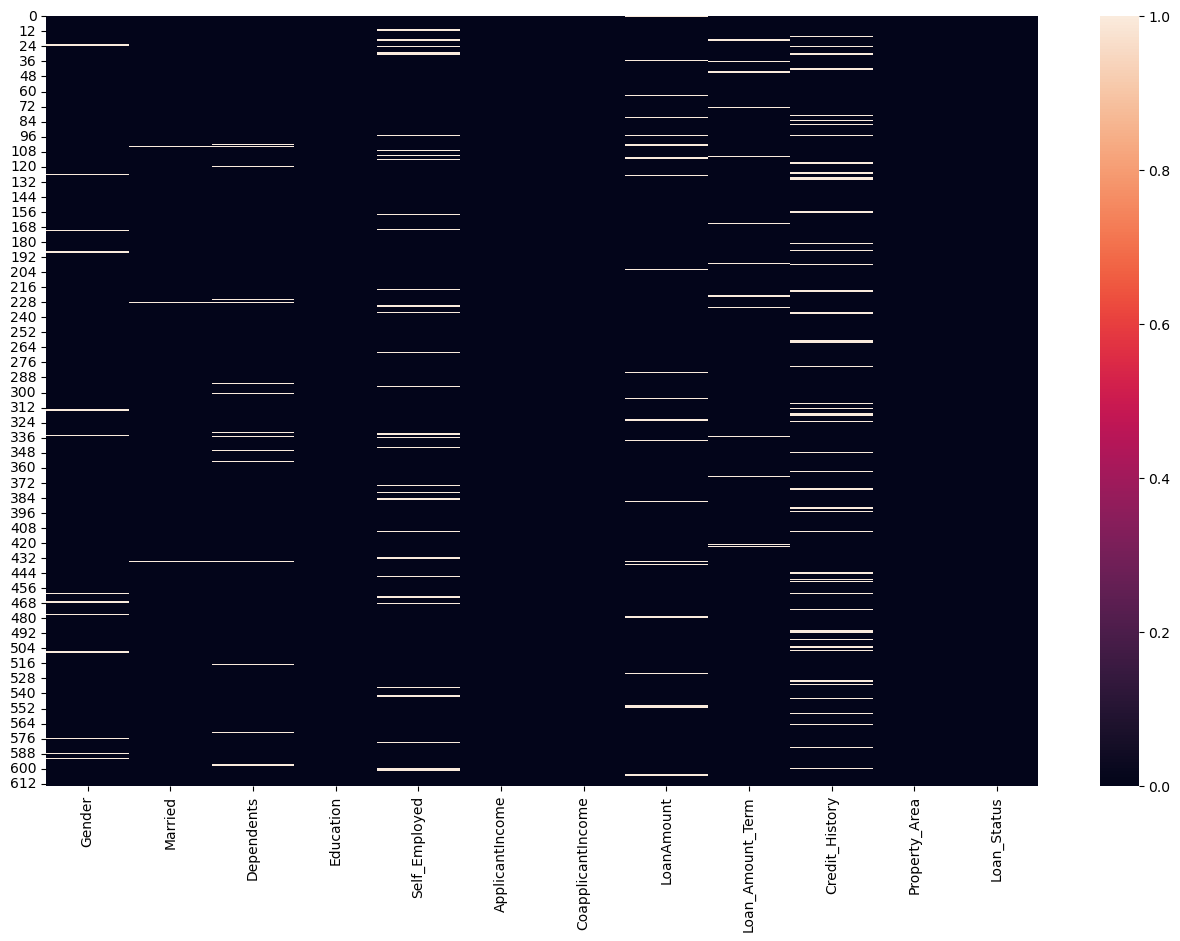

In [15]:
# Heatmap plot with null values
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [16]:
#Finding the percentage of data missing from the dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
null_values=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null=null_values.sort_values(by=["% Missing data"],ascending=False)
df_null=df_null.reset_index(drop=False)
df_null

Missing Values


,index,Data Type,Missing Values,% Missing data
0,Credit_History,float64,50,8.1
1,Self_Employed,object,32,5.2
2,LoanAmount,float64,22,3.6
3,Dependents,object,15,2.4
4,Loan_Amount_Term,float64,14,2.3
5,Gender,object,13,2.1
6,Married,object,3,0.5
7,Education,object,0,0.0
8,ApplicantIncome,int64,0,0.0
9,CoapplicantIncome,float64,0,0.0


### Observations:
- **7 features are having missing data**
- **The data loss in all the features is less than 10%. I will work on the imputation for these features**

In [17]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [18]:
df_1=df.copy()  

### Observations:
- **I need to perform imputation to fill missing/null values in the columns**
- **I will apply "simple imputer" to get the imputed dataset. For continous data, I will use "median" to replace null values as "mean" can be sensitive to outliers. For object data, I will use "mode" to replace null values**

In [19]:
# Segregating colums with null values based on the datatype
df_null_cat=['Self_Employed','Dependents','Gender','Married']
df_null_num=['Credit_History','LoanAmount','Loan_Amount_Term']

In [20]:
# Filling null values of columns with categorical data with first value of 'mode'
for i in df_null_cat:
    if (df[i].dtype=='O' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].mode()[0])

In [21]:
# Filling null values of columns with numerical data with 'median' as 'mean' can be sensitive to outliers
for i in df_null_num:
    if (df[i].dtype=='float64' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].median())

print(df.isnull().sum().sum())

0


#### Observations:
- **No null values in the dataframe after imputation**

In [22]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Segregating columns based on data type for better EDA

In [23]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

In [24]:
df_int_cat=['Credit_History','Dependents'] # categorical data with numeric values
df_int_nocat=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] # numeric data

In [25]:
#Object data (categorical data with string values)
df_cat_str=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [26]:
df_numerical=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_categorical=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History','Dependents']

In [27]:
df_numerical=df[df_numerical]
df_categorical=df[df_categorical]

# Statistical Summary:

In [28]:
# Statistical summary for numerical data
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0


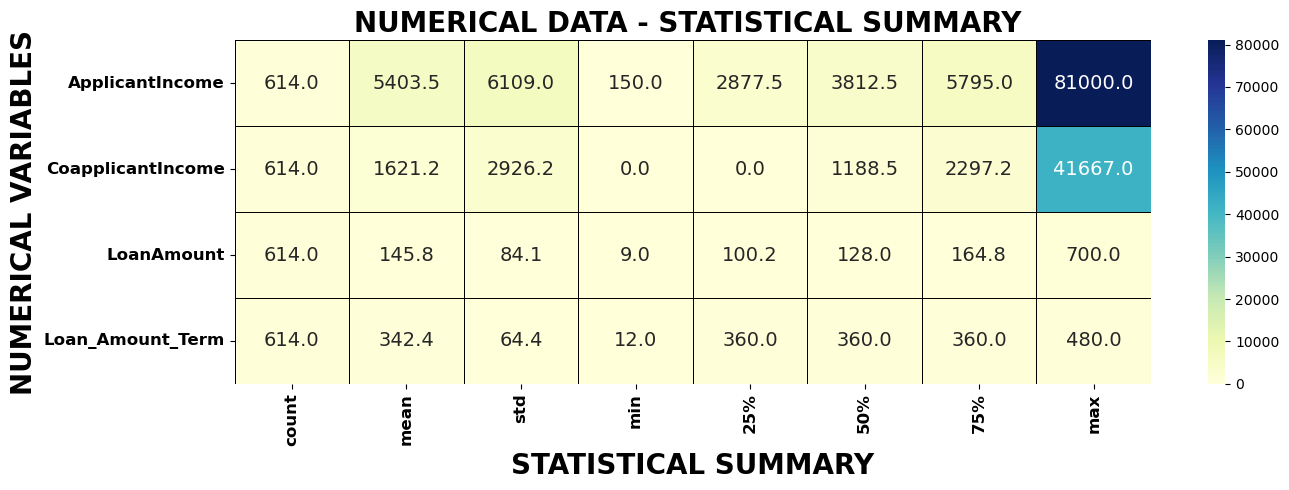

In [29]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(14,5))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **count is same for all columns. Hence,no null values are present.**
- **Applicant income varies between 150 to 81000 and the average income of applicant is 5403.45**
- **we can see coapplicant income is less than the applicant income**
- **mean is greater than median for most of the features.Hence,data is right skewed.**
- **Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.**
- **large difference between max and 75% shows the presence of outliers**

In [30]:
# Statistical summary for object data type
df_categorical.describe(include='O').T

,count,unique,top,freq
Gender,614,2,Male,502
Married,614,2,Yes,401
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422
Dependents,614,4,0,360


#### Observations:
- **count is same for all columns. Hence,no null values are present.**
- **Most of the applicants are male and married.**
- **most of the applicants are graduates and are not selfemployed**

# Visualization of data

### Univariate Graphical Analysis for Categorical data

In [31]:
len(df_cat_str)

6

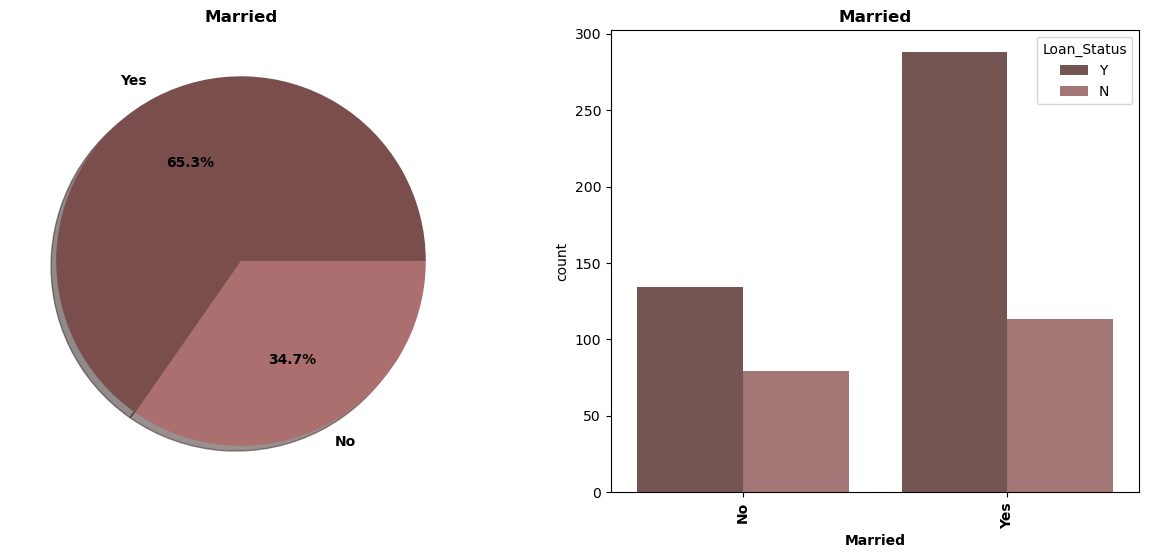

Observations for feature MARRIED:


,Value,Count,% Count
0,Yes,401,65.3
1,No,213,34.7


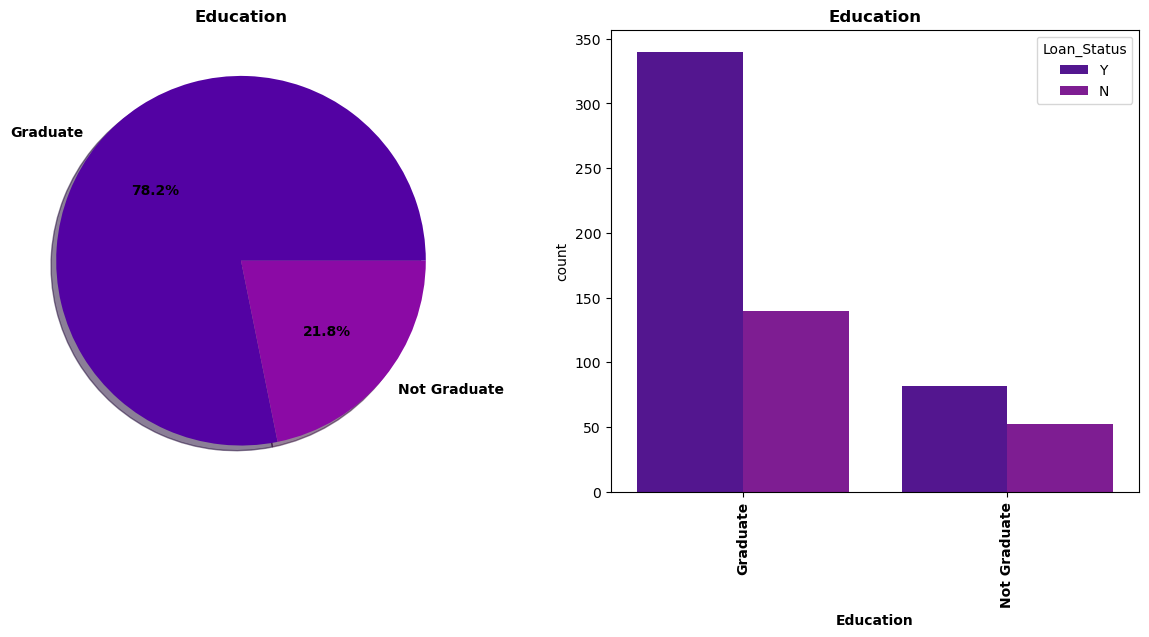

Observations for feature EDUCATION:


,Value,Count,% Count
0,Graduate,480,78.2
1,Not Graduate,134,21.8


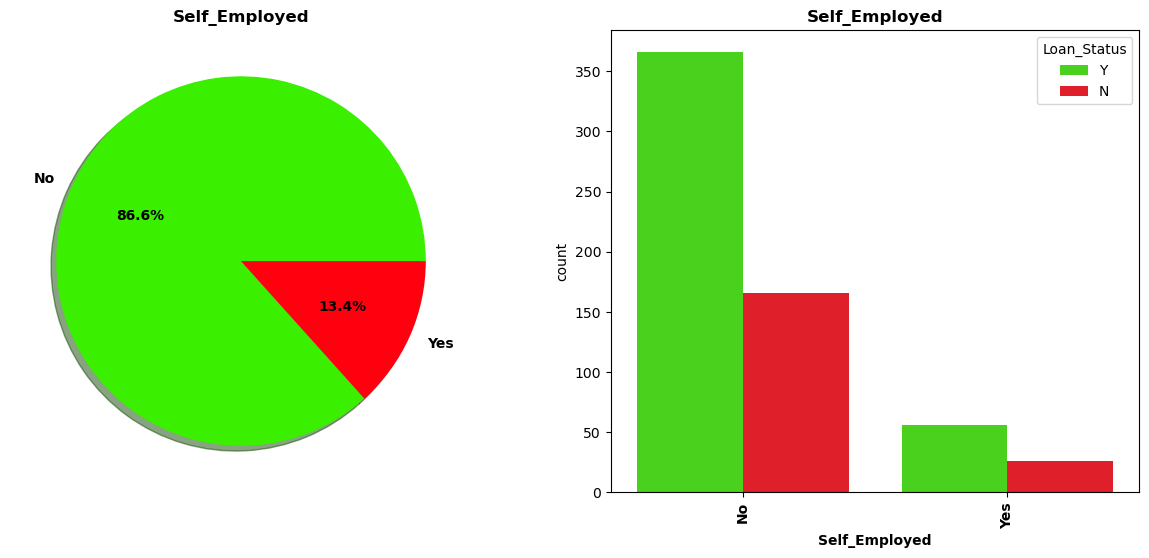

Observations for feature SELF_EMPLOYED:


,Value,Count,% Count
0,No,532,86.6
1,Yes,82,13.4


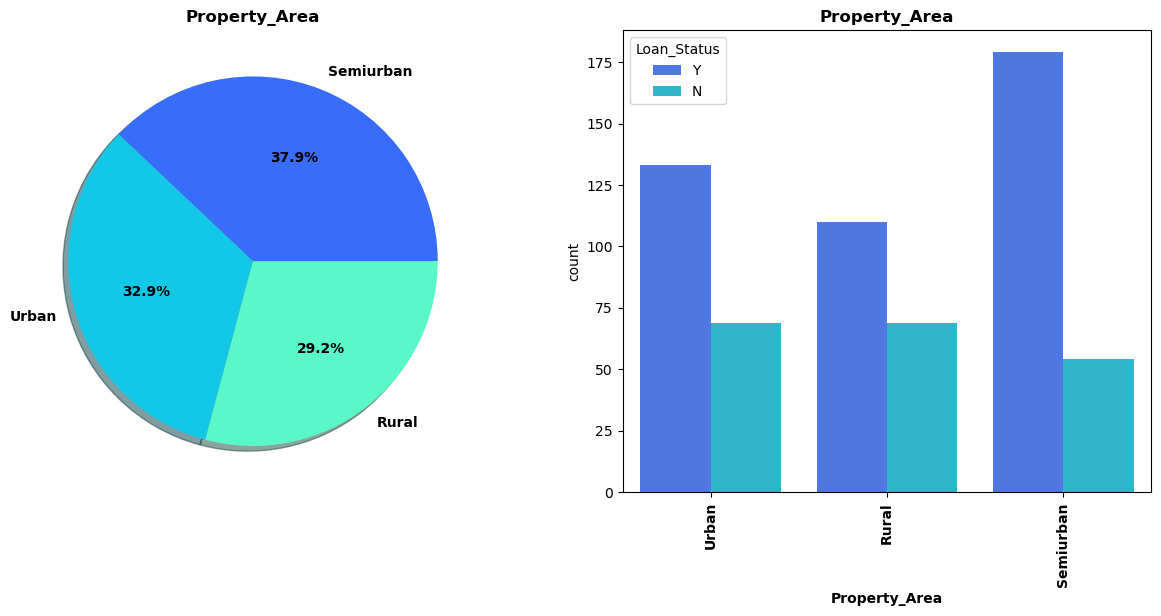

Observations for feature PROPERTY_AREA:


,Value,Count,% Count
0,Semiurban,233,37.9
1,Urban,202,32.9
2,Rural,179,29.2


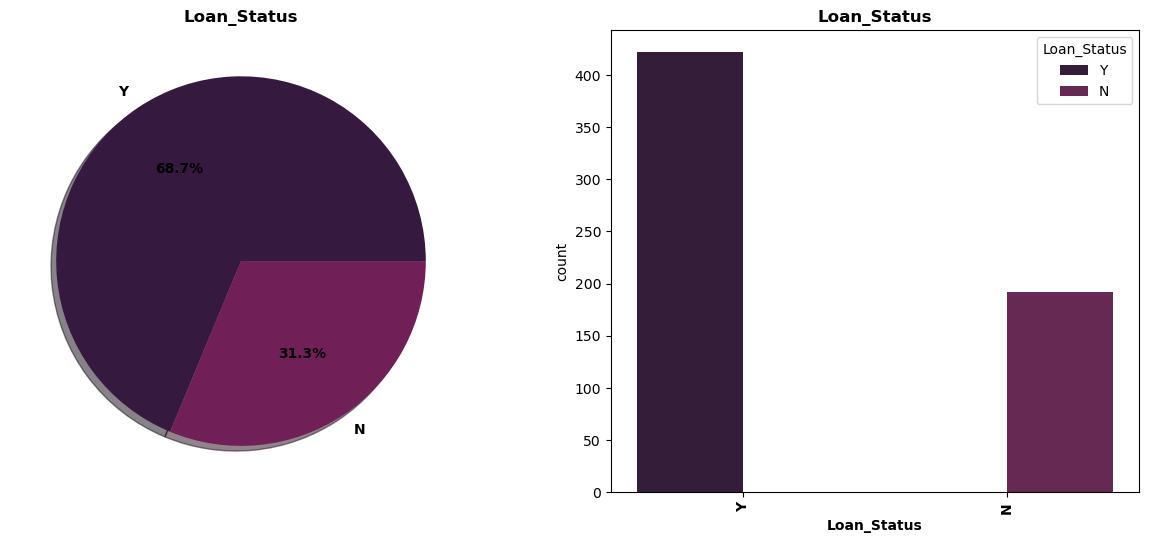

Observations for feature LOAN_STATUS:


,Value,Count,% Count
0,Y,422,68.7
1,N,192,31.3


In [32]:
colors=['pink', 'plasma','prism', 'rainbow', 'rocket', 
        'seismic', 'spring','summer', 'tab10', 'tab20','terrain', 'turbo', 'twilight','viridis', 'vlag', 'winter']
plotnumber =1
for i in df_cat_str[1:]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,2,figsize=(15,6))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],hue=df["Loan_Status"],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

#### Observation:
- **Most of the applicants are married and they took loan more than unmarried**
- **Many applicants are graduates,who took more loan.And self employed applicants are less in count**
- **semi urban are more than rural and urban**

### Univariate Graphical Analysis for Categorical data - Int Data Type

In [33]:
df_int_cat=['Credit_History','Dependents']

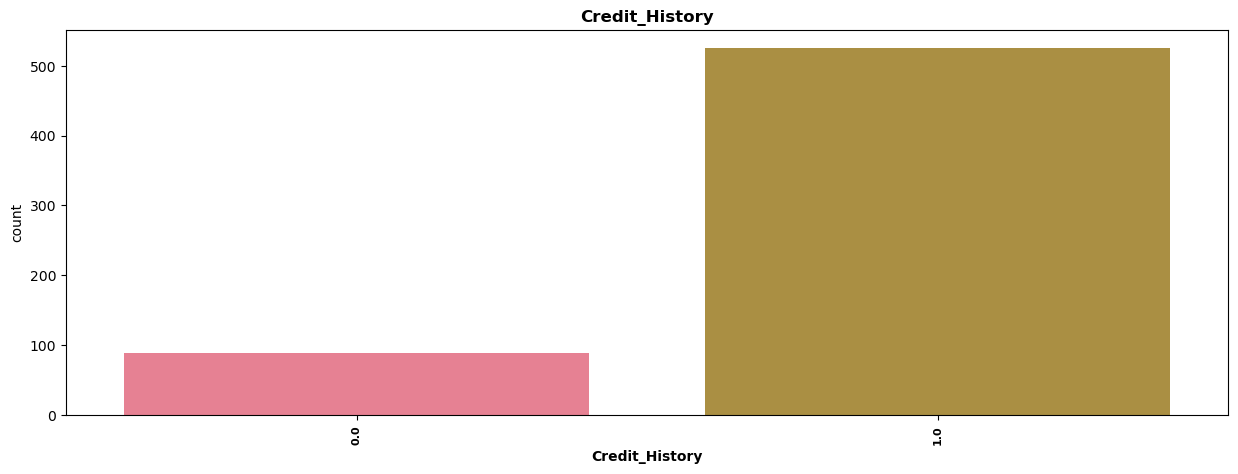

Observations for feature CREDIT_HISTORY:


,Value,Count,% Count
0,1.0,525,85.5
1,0.0,89,14.5


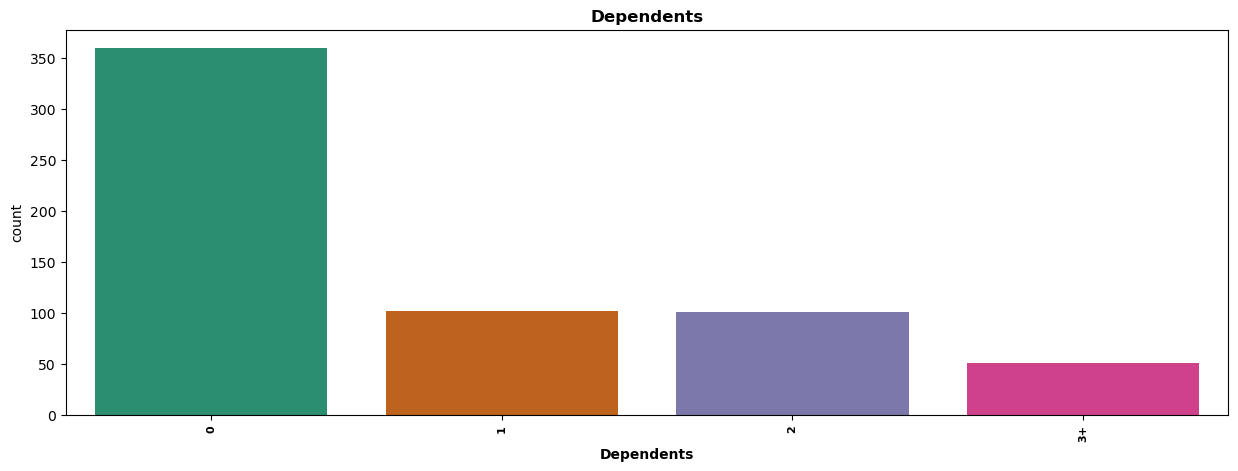

Observations for feature DEPENDENTS:


,Value,Count,% Count
0,0,360,58.6
1,1,102,16.6
2,2,101,16.4
3,3+,51,8.3


In [34]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket']
plotnumber =1
for i in df_int_cat:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,1,figsize=(15,5))
        sns.countplot(df[i],data=df)
        ax.set_title(i,fontsize=12,fontweight ='bold')
        ax.set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts()).iloc[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

#### Observation:
- **applicants ability to repay debts and demonstrated responsibility in repaying them are more in number**
- **Applicants without dependents are more in number**

### Univariate Graphical Analysis for Numerical data

In [35]:
len(df_numerical.columns)

4

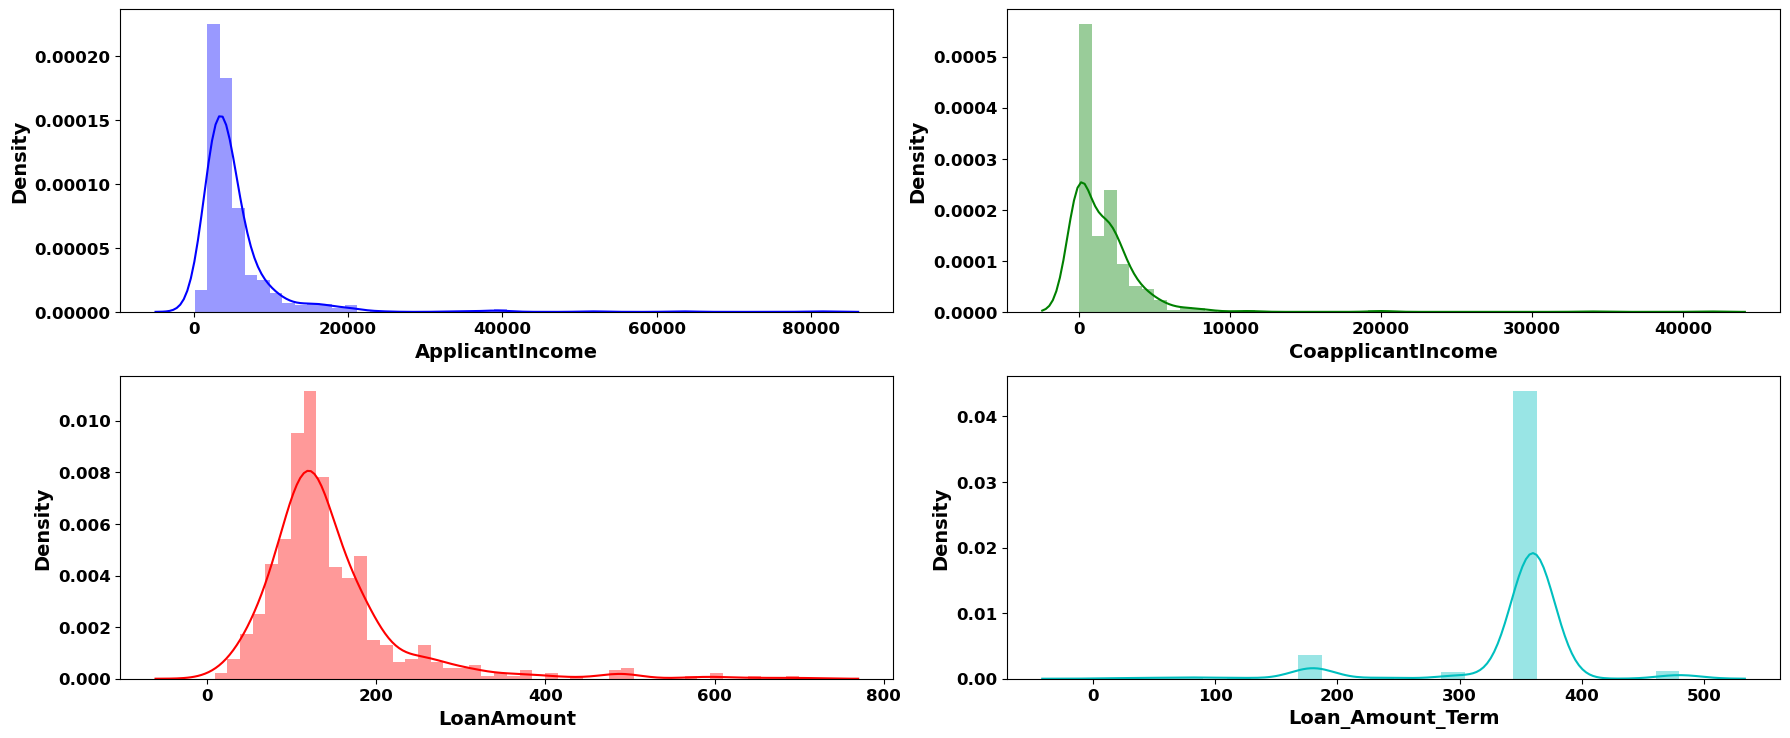

In [36]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observation:
- **Most of the applicantIncome varies between 0 to 20000.Applicants income is more than coapplicantincome**
- **The max duaration in which the loan is availed is for 480months**

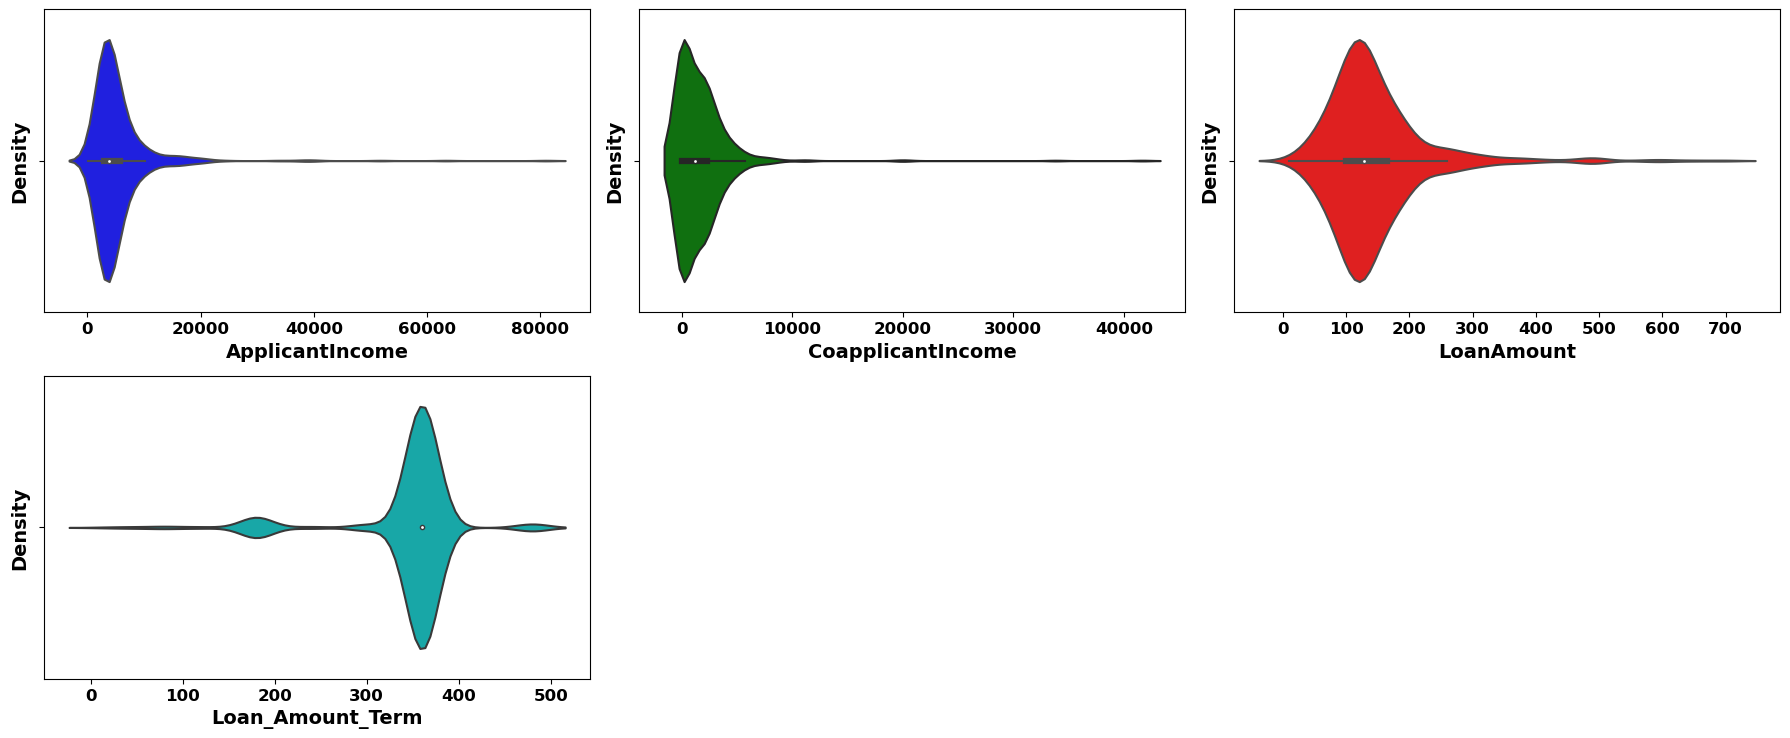

In [37]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,3,plotnum)
        sns.violinplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Bivariate Graphical Analysis for Categorical data - Int Data Type

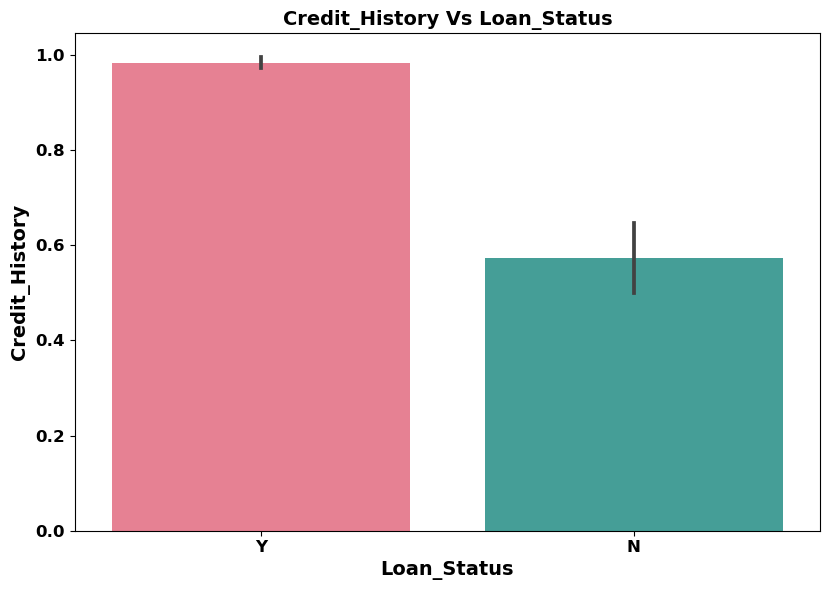

In [38]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df['Loan_Status'],df[df_int_cat[0]], palette = 'husl')
plt.title('{} Vs Loan_Status'.format(df_int_cat[0]),fontsize=14, fontweight='bold')
plt.xlabel('Loan_Status', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()


#### Observation:
- **applicants ability to repay debts and demonstrated responsibility in repaying them are more in number**

### Bivariate Graphical Analysis for Numerical data

In [39]:
df_numerical.shape

(614, 4)

In [40]:
df_num=df_numerical.columns
df_num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

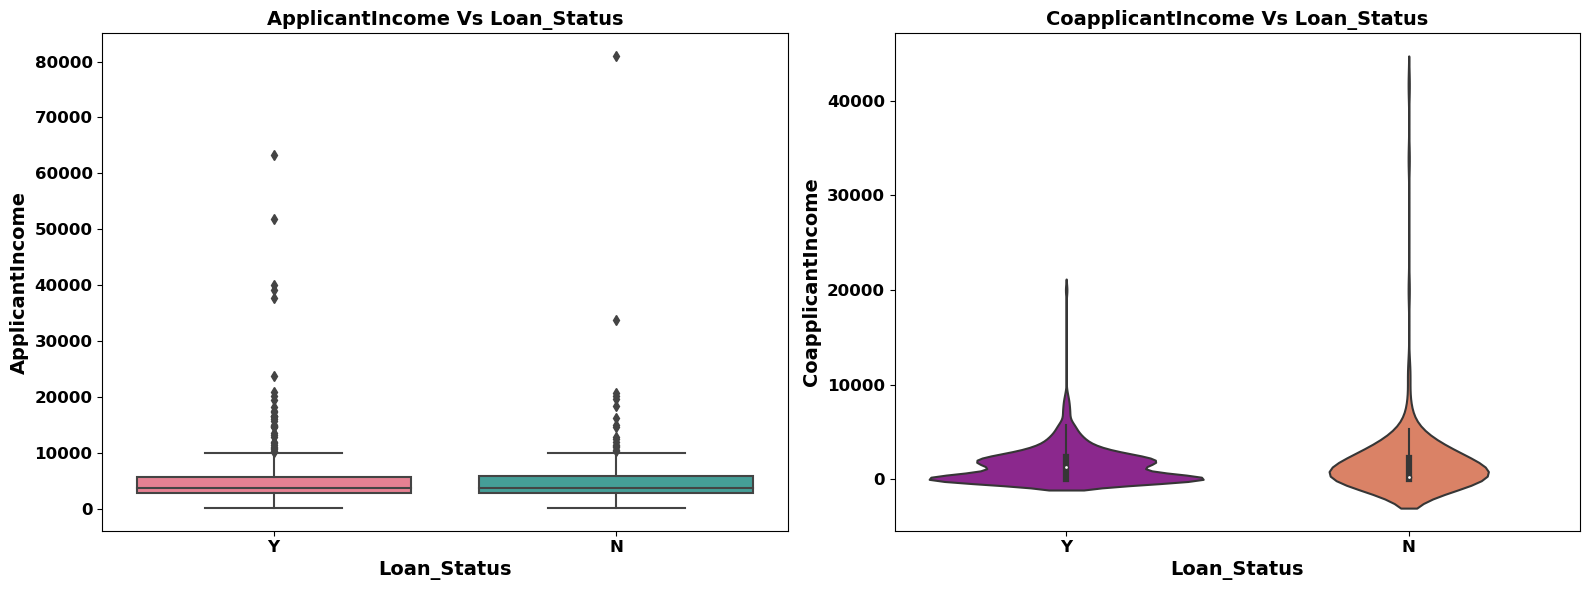

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Loan_Status'],df[df_num[0]], palette = 'husl')
plt.title('{} Vs Loan_Status'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.xlabel('Loan_Status', fontsize=14,fontweight='bold')
plt.ylabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Loan_Status'],df[df_num[1]], palette = 'plasma')
plt.title('{} Vs Loan_Status'.format(df_num[1]),fontsize=14, fontweight='bold')
plt.xlabel('Loan_Status', fontsize=14,fontweight='bold')
plt.ylabel(df_num[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **we can see outliers where applicant income is more still he is not eligible for loan**
- **plot shows existence of many outliers in the data provided**

### Multivariate Graphical Analysis

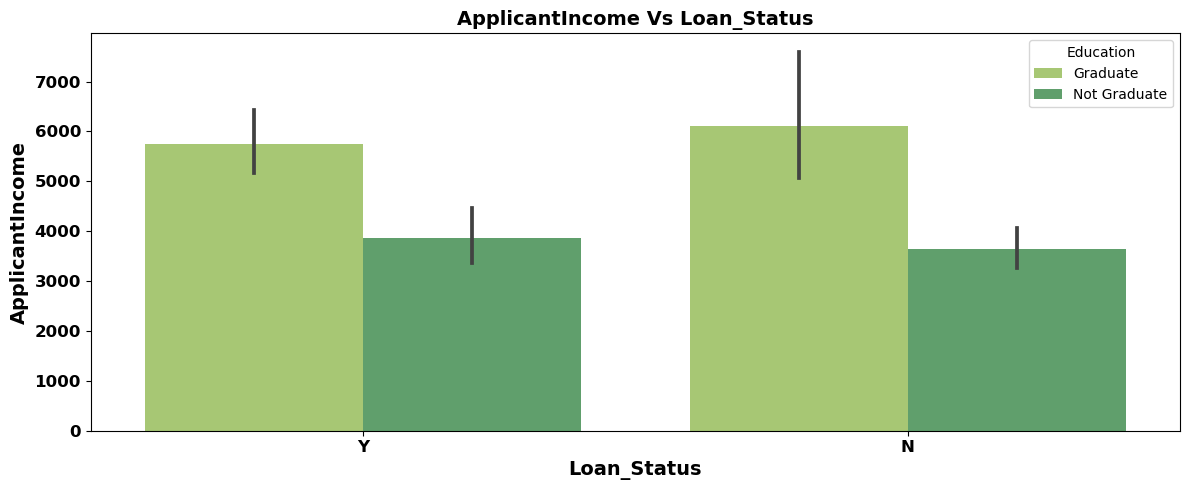

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df,hue='Education', palette='summer_r')
plt.title("ApplicantIncome Vs Loan_Status",fontsize=14, fontweight='bold')
plt.ylabel('ApplicantIncome', fontsize=14,fontweight='bold')
plt.xlabel('Loan_Status', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Most of the applicants who took loan are graduates**

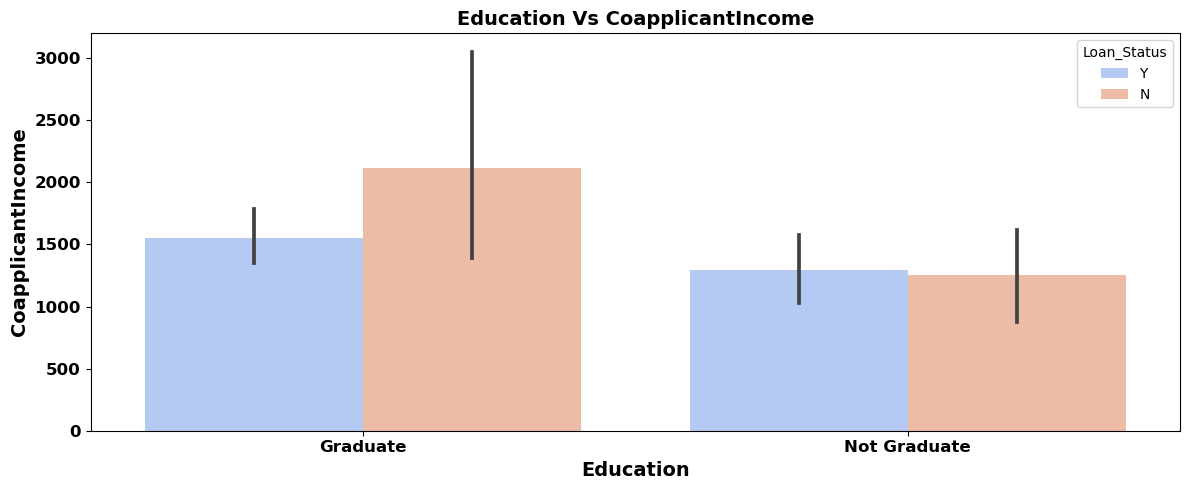

In [44]:
plt.figure(figsize=(12,5))
sns.barplot(x='Education',y='CoapplicantIncome',data=df,hue='Loan_Status', palette='coolwarm')
plt.title("Education Vs CoapplicantIncome",fontsize=14, fontweight='bold')
plt.ylabel('CoapplicantIncome', fontsize=14,fontweight='bold')
plt.xlabel('Education', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation;
- **Graduate applicants are more likely to get loan approval irrespective gender.**

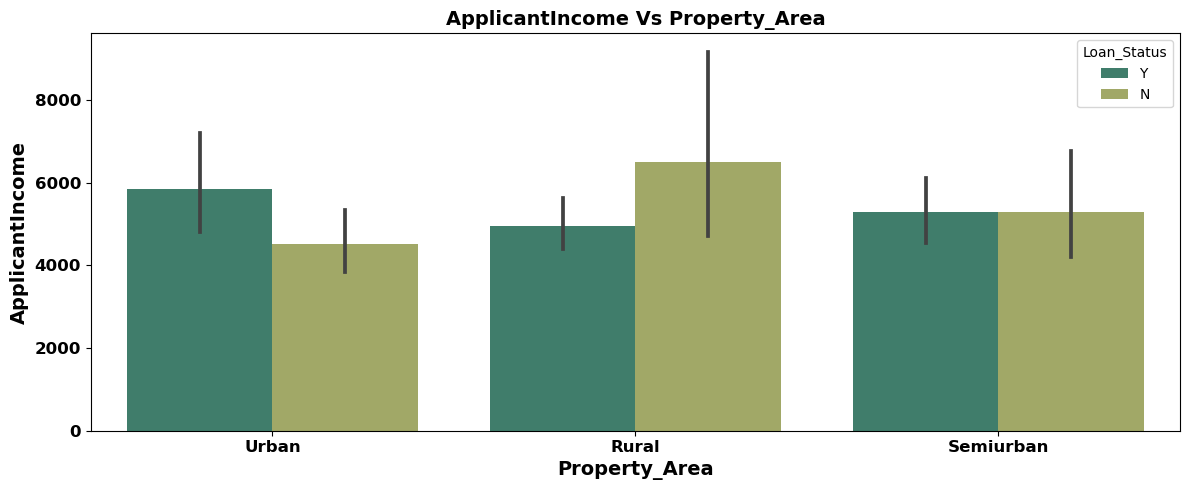

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(y='ApplicantIncome',x='Property_Area',data=df,hue='Loan_Status', palette='gist_earth')
plt.title("ApplicantIncome Vs Property_Area",fontsize=14, fontweight='bold')
plt.ylabel('ApplicantIncome', fontsize=14,fontweight='bold')
plt.xlabel('Property_Area', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **More applicants in rural area are not applicable for loan.urban people have more chances of getting loan**

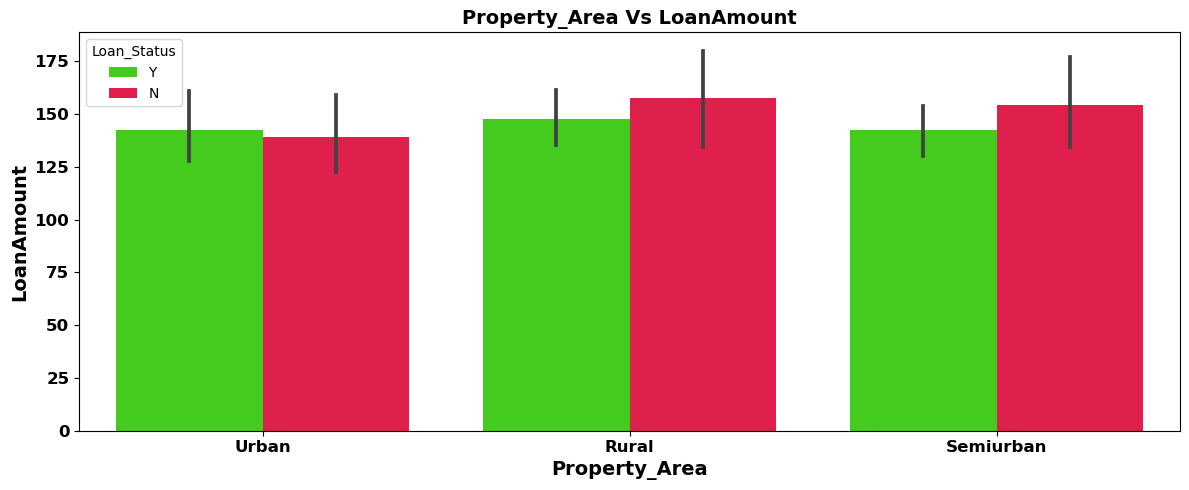

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(y='LoanAmount',x='Property_Area',data=df,hue='Loan_Status', palette='prism')
plt.title('Property_Area Vs LoanAmount',fontsize=14, fontweight='bold')
plt.ylabel('LoanAmount', fontsize=14,fontweight='bold')
plt.xlabel('Property_Area', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Most of the People with rural and semiurban property area,loan status is N.people with urban property area received more loan**

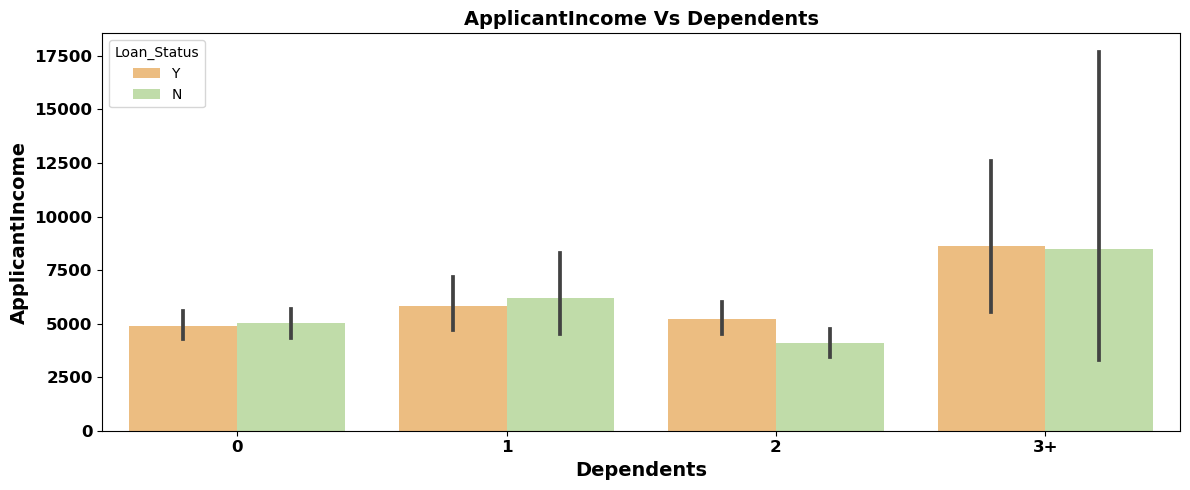

In [47]:
plt.figure(figsize=(12,5))
sns.barplot(y='ApplicantIncome',x='Dependents',data=df,hue='Loan_Status', palette='Spectral')
plt.title("ApplicantIncome Vs Dependents",fontsize=14, fontweight='bold')
plt.ylabel('ApplicantIncome', fontsize=14,fontweight='bold')
plt.xlabel('Dependents', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **we can see more the number of dependents more the chances of getting loan**

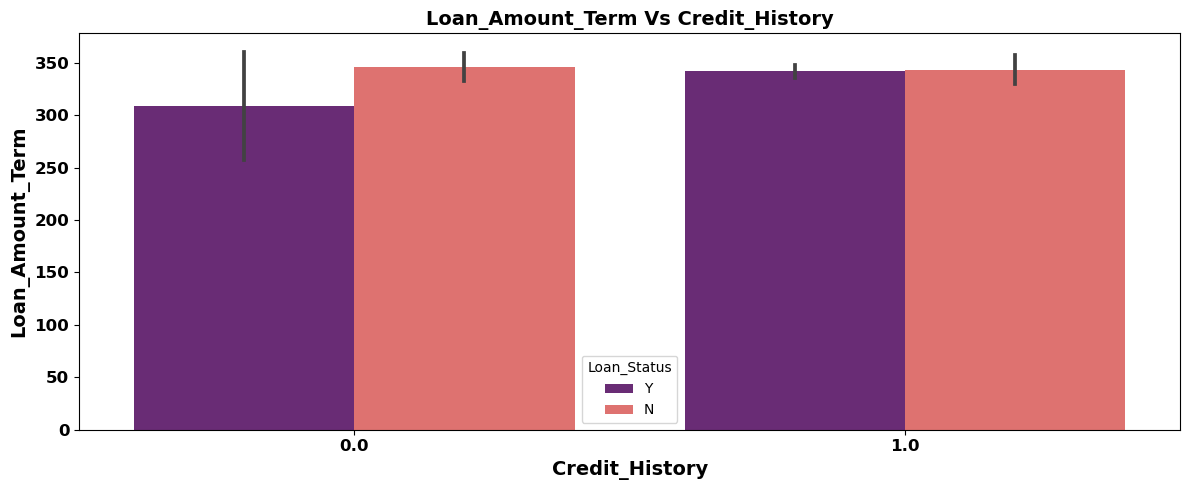

In [48]:
plt.figure(figsize=(12,5))
sns.barplot(y='Loan_Amount_Term',x='Credit_History',data=df,hue='Loan_Status', palette='magma')
plt.title("Loan_Amount_Term Vs Credit_History",fontsize=14, fontweight='bold')
plt.ylabel('Loan_Amount_Term', fontsize=14,fontweight='bold')
plt.xlabel('Credit_History', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **The applicant ability to repay debts and demonstrated responsibility in repaying them are more than who doesn't pay**

# Encoding of categorical features:

In [49]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate LabelEncoder
mappings = {}
for i in df_categorical:
    df[i] = le.fit_transform(df[i])

    # print the mapping of categories to integers for the current column
    print(f"{i}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # add the mapping of categories to integers to the dictionary
    mappings[f"{i}_num"] = list(range(len(le.classes_)))
    mappings[f"{i}_cat"] = list(le.classes_)
    
print("="*125)    
# print the mappings
for key, value in mappings.items():
    print(f"{key}: {value}")
print("="*125)
    
df.head()

Gender: {'Female': 0, 'Male': 1}
Married: {'No': 0, 'Yes': 1}
Education: {'Graduate': 0, 'Not Graduate': 1}
Self_Employed: {'No': 0, 'Yes': 1}
Property_Area: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status: {'N': 0, 'Y': 1}
Credit_History: {0.0: 0, 1.0: 1}
Dependents: {'0': 0, '1': 1, '2': 2, '3+': 3}
Gender_num: [0, 1]
Gender_cat: ['Female', 'Male']
Married_num: [0, 1]
Married_cat: ['No', 'Yes']
Education_num: [0, 1]
Education_cat: ['Graduate', 'Not Graduate']
Self_Employed_num: [0, 1]
Self_Employed_cat: ['No', 'Yes']
Property_Area_num: [0, 1, 2]
Property_Area_cat: ['Rural', 'Semiurban', 'Urban']
Loan_Status_num: [0, 1]
Loan_Status_cat: ['N', 'Y']
Credit_History_num: [0, 1]
Credit_History_cat: [0.0, 1.0]
Dependents_num: [0, 1, 2, 3]
Dependents_cat: ['0', '1', '2', '3+']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [50]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], int64: ['ApplicantIncome', 'Credit_History'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']}

# Checking coefficients of correlation (r)

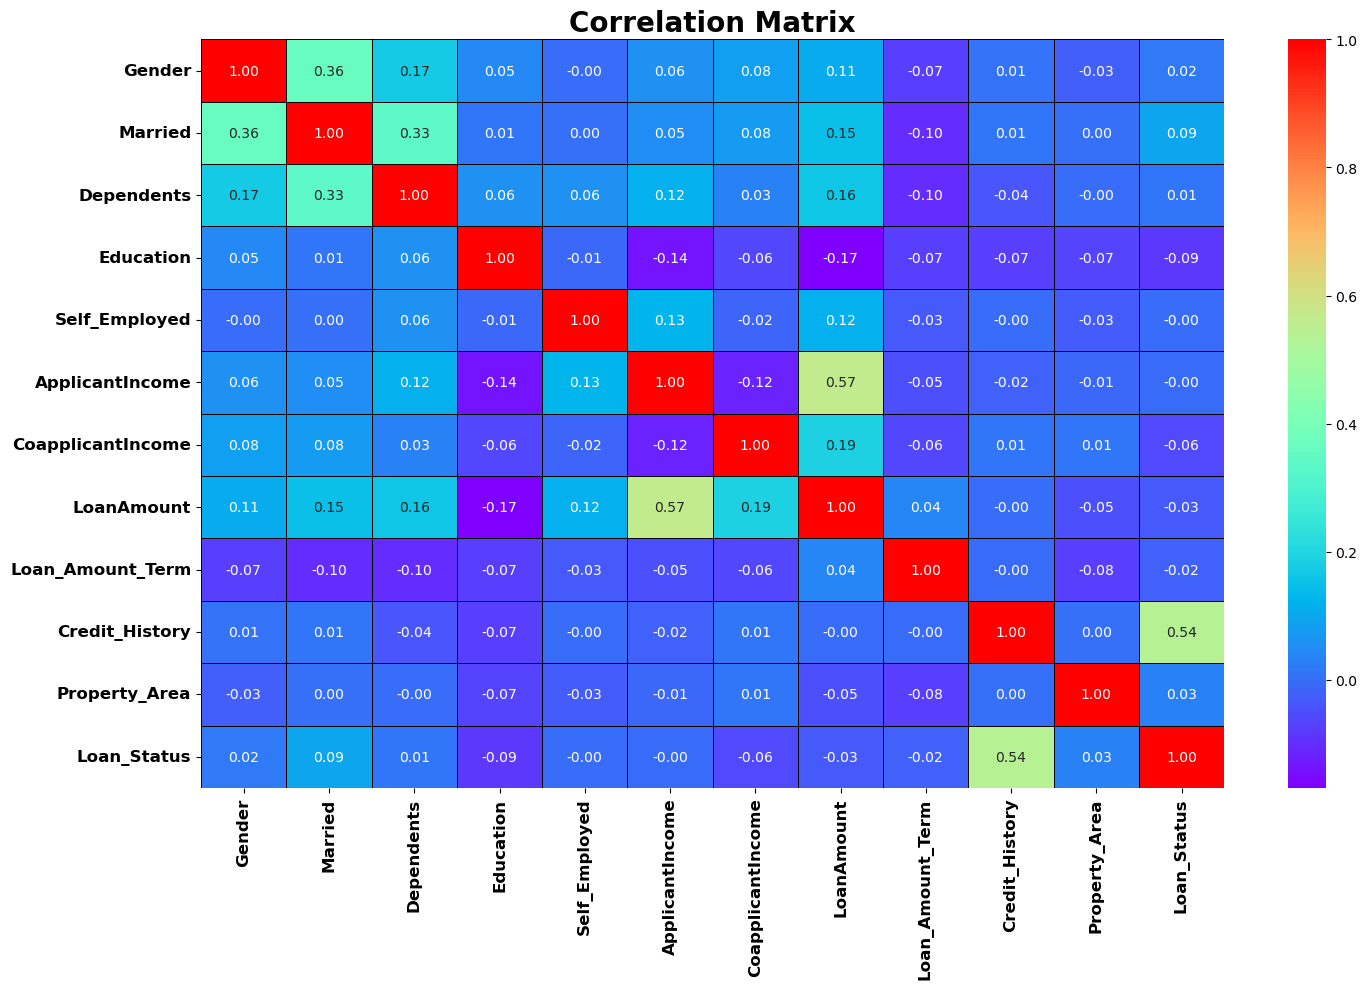

In [51]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

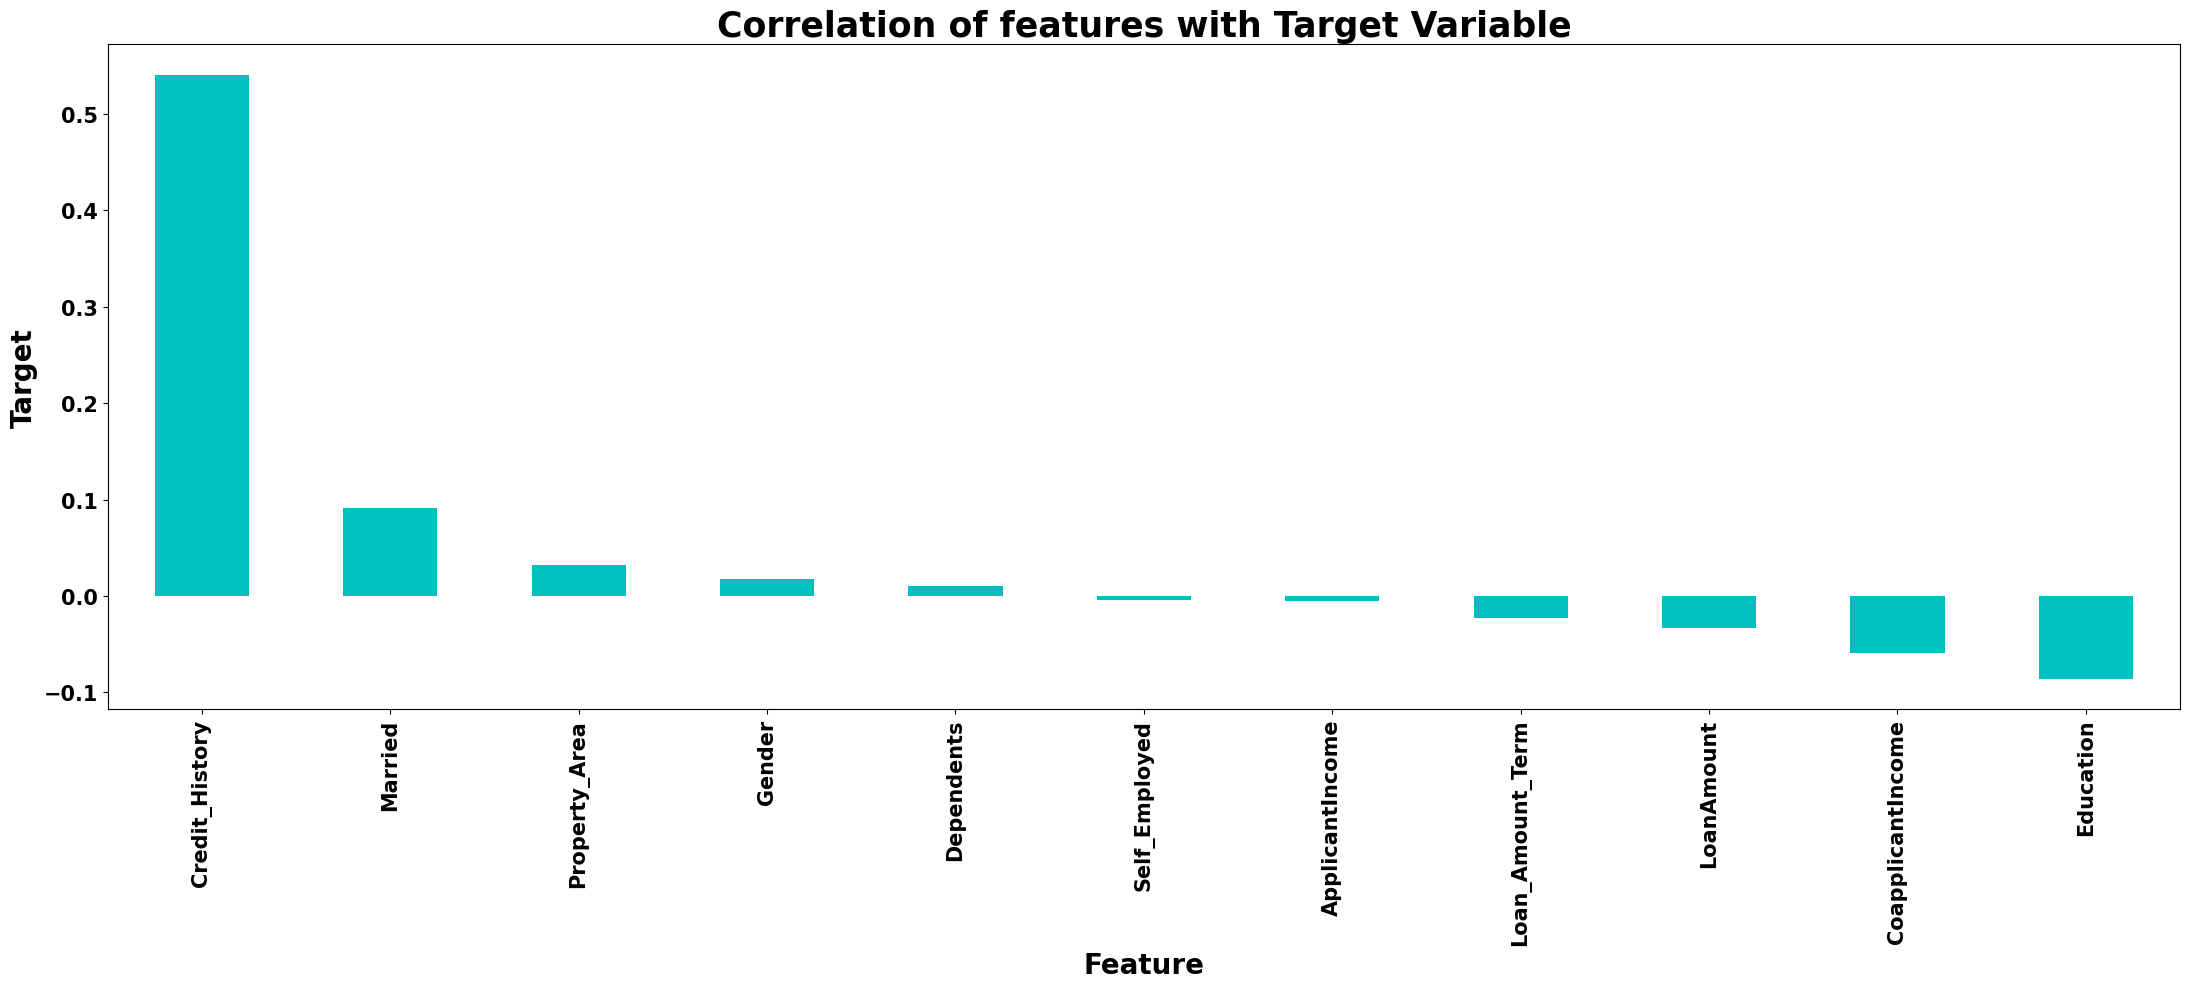

In [52]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [53]:
corr_r['Loan_Status'].sort_values(ascending=False) 

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

#### Observations for target variable:
- **There are multiple features with weak and very weak corrleations**
- **Max +ve correlation: 'Credit_History'** 
- **Max -ve correlation: 'Education'**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation**
- **Considering -0.01 to 0.01 range as very weak correlation with target variable. Idenfied features within this range are Gender,Dependents,Self_Employed,ApplicantIncome**
- **I will check feature scores from SelectKBest algorithm with f_classif and also will check using Feature Importance with ExtraTreeClassifier, then I will take a decision on dropping features from the dataset**

# Checking top features using SelectKBest algorithm

In [54]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif            # SelectKBest algorithm with ANOVA F-value

x=df.drop('Loan_Status',axis=1)  #independent columns
y=df['Loan_Status']  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

,Specs,Score
0,Credit_History,252.652090
1,Married,5.164552
2,Education,4.547685
3,CoapplicantIncome,2.151457
4,LoanAmount,0.675896
5,Property_Area,0.631733
6,Loan_Amount_Term,0.311334
7,Gender,0.198059
8,Dependents,0.062665
9,ApplicantIncome,0.013574


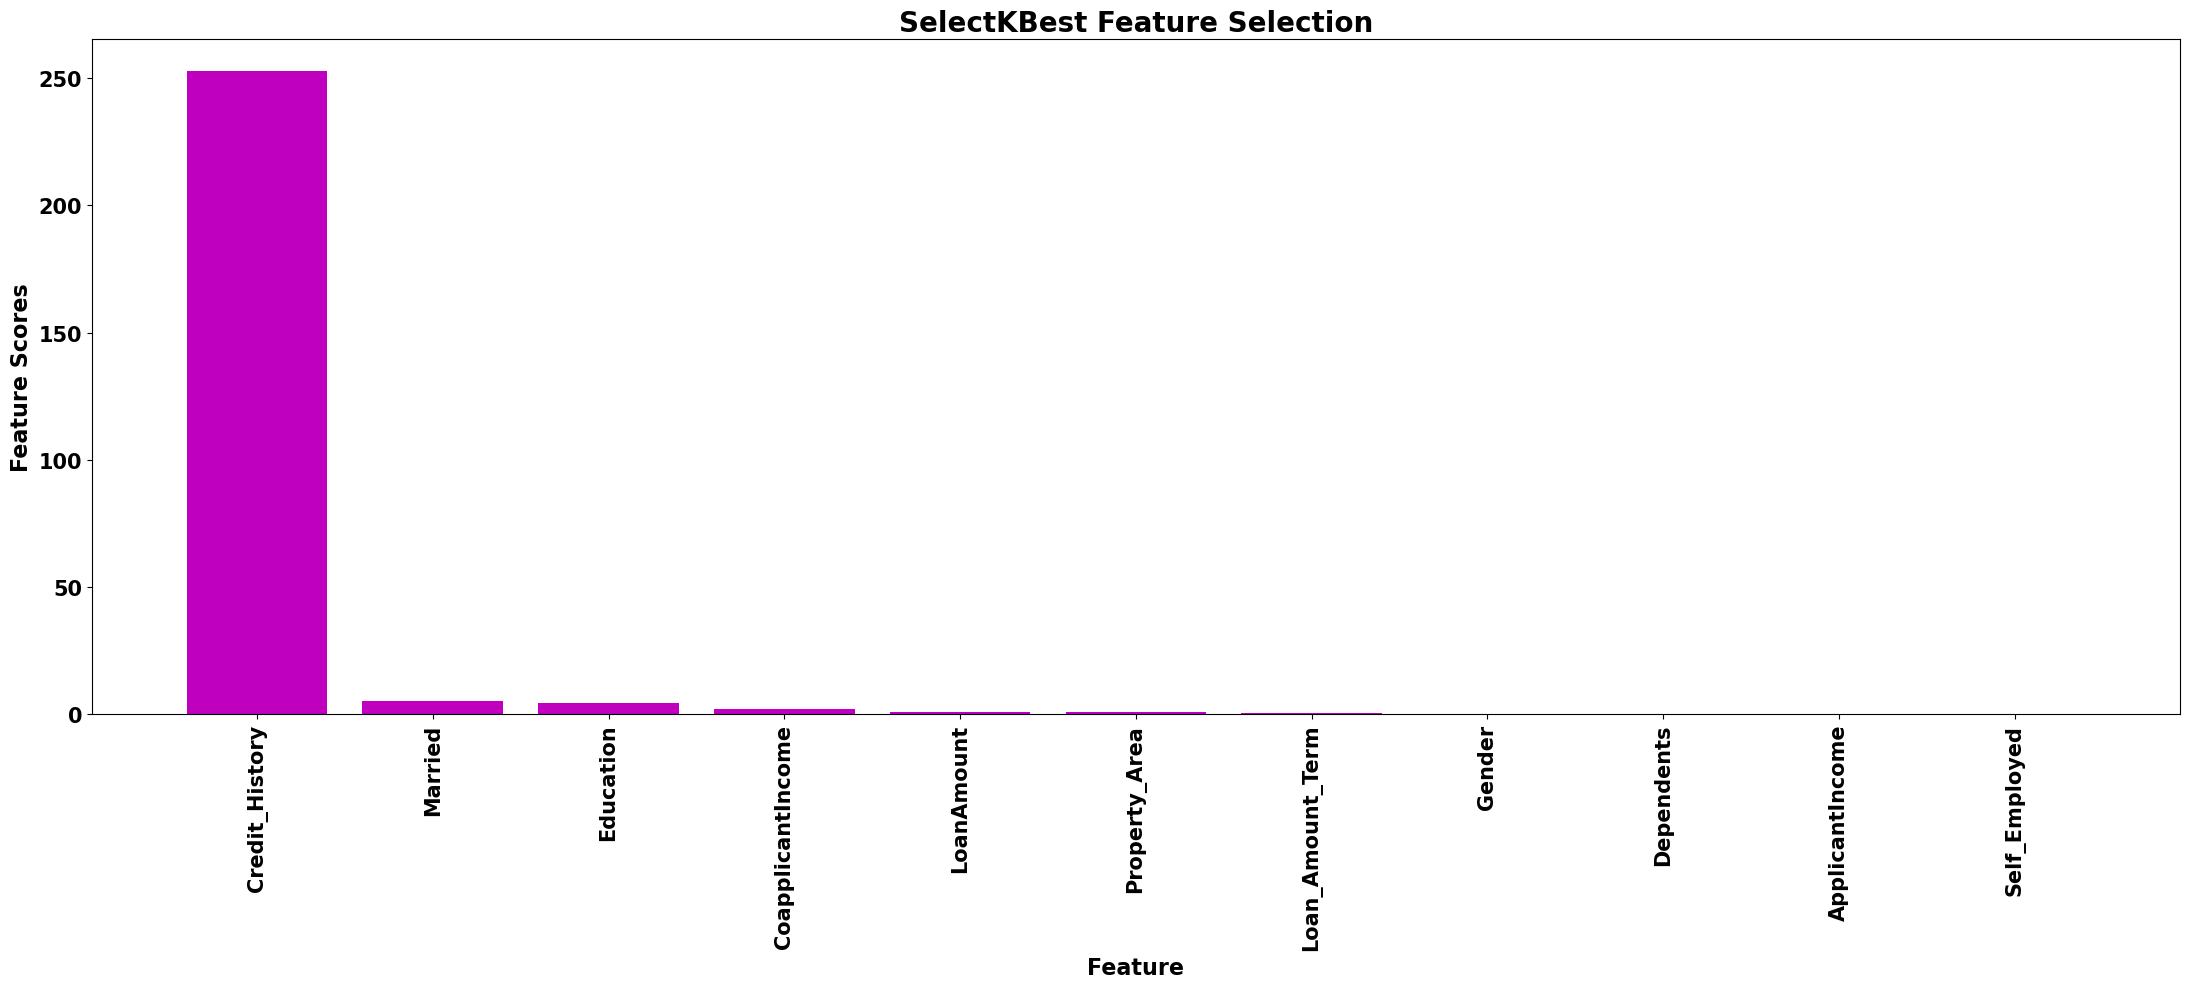

In [55]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **3 Features with least score based on selectKbest algorithm are Self_Employed,ApplicantIncome,Dependents**

# Checking top features using Feature Importance - Extra Tree Classifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

,Specs,Score
0,Credit_History,0.280392
1,ApplicantIncome,0.185749
2,LoanAmount,0.183160
3,CoapplicantIncome,0.120275
4,Dependents,0.053789
5,Property_Area,0.049086
6,Loan_Amount_Term,0.046173
7,Self_Employed,0.021304
8,Education,0.020885
9,Married,0.020059


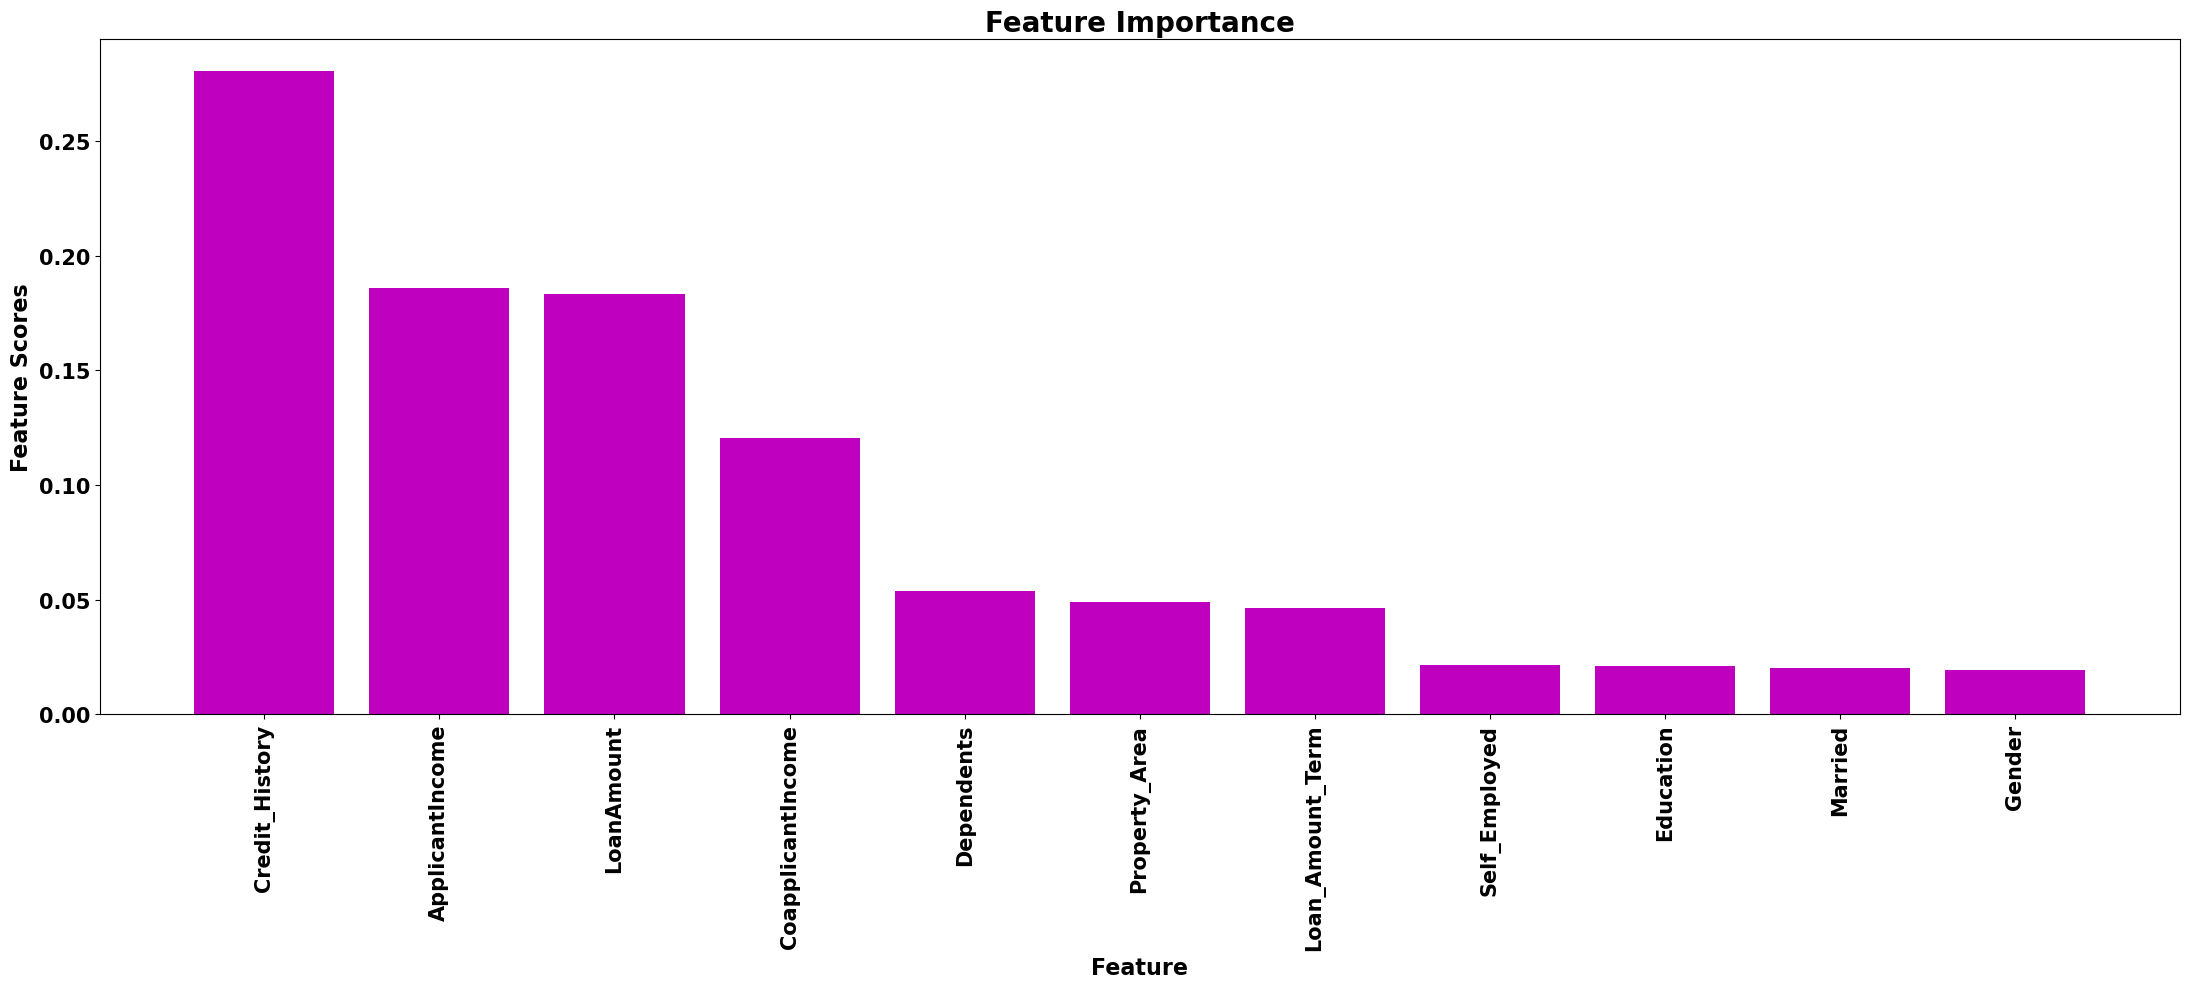

In [57]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **3 Features with least score based on Feature Importance with Extra Tree Classifier are Self_Employed,Gender,married**
- **As 'Self_Employed' and 'Gender' are the features with lowest scores coming in all checked feature selection techniques, hence dropping these two columns from the dataset**

In [58]:
df.drop(["Self_Employed","Gender"],axis=1, inplace=True)
df.head(3)

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,1,0,0,3000,0.0,66.0,360.0,1,2,1


# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [59]:
# We calculate VIF only for numerical data as the variance is applicable only for numerical data

In [60]:
# Identifying the columns with numerical data after dropping the columns identified in previous steps

In [61]:
df_numerical.shape

(614, 4)

In [62]:
# Looping to get the list of numerical variables left in the dataset after dropping columns based on previous steps
df_num_filter=[]
for i in df_numerical.columns:
    for j in df.columns:
        if i==j:
            df_num_filter.append(i)
print(len(df_num_filter))
display(df_num_filter)

4


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [63]:
df_vif=df[df_num_filter]
df_vif.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [64]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_vif[list(df_vif.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,6.457683,LoanAmount
3,3.753503,Loan_Amount_Term
0,2.845794,ApplicantIncome
1,1.458045,CoapplicantIncome


#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As VIF values < 10 for all the numerical features, there is no multi-collinearity in the dataset**

# Checking Outliers

In [65]:
# We check outliers on numerical data
df_outliers=df_vif.copy()
df_outliers.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [66]:
df_outliers.shape

(614, 4)

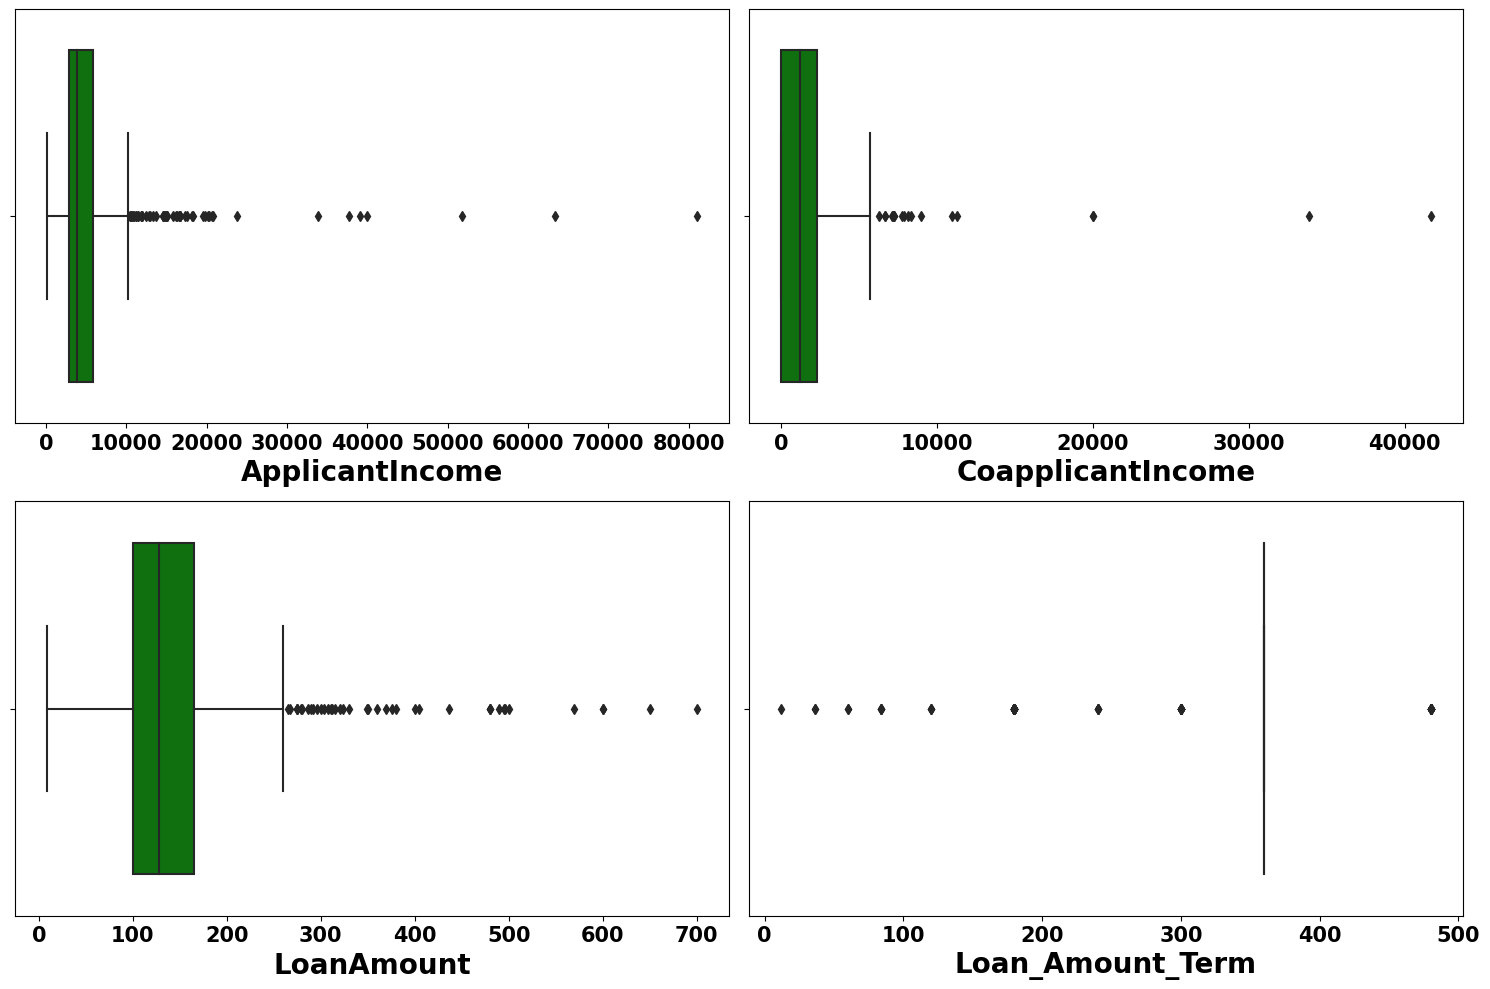

In [67]:
# Checking outliers visually
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=20:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in many columns**

# Removing Outliers using z-score method

In [68]:
df_outliers.shape

(614, 4)

In [69]:
df.shape

(614, 10)

In [70]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [71]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_1=df[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

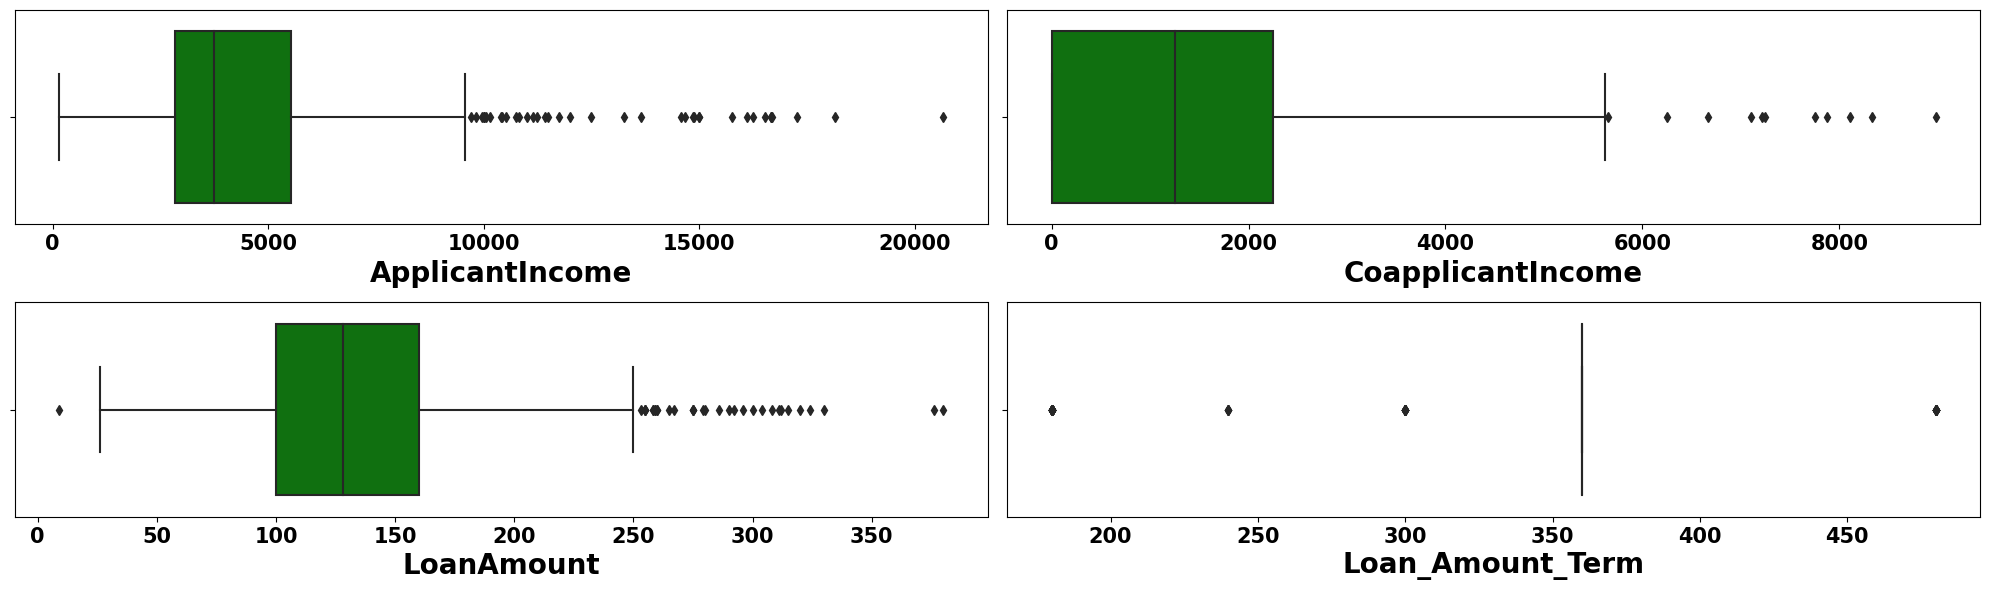

In [72]:
# Checking outliers visually
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [73]:
df_1.shape

(577, 10)

In [74]:
df.shape

(614, 10)

In [75]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df.shape[0]-df_1.shape[0])/df.shape[0]*100,1)
loss_percent_zscore

6.0

#### Observations:
- **Data loss with z-score method is 6%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

# Removing Outliers using IQR method

In [76]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_2 = df[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

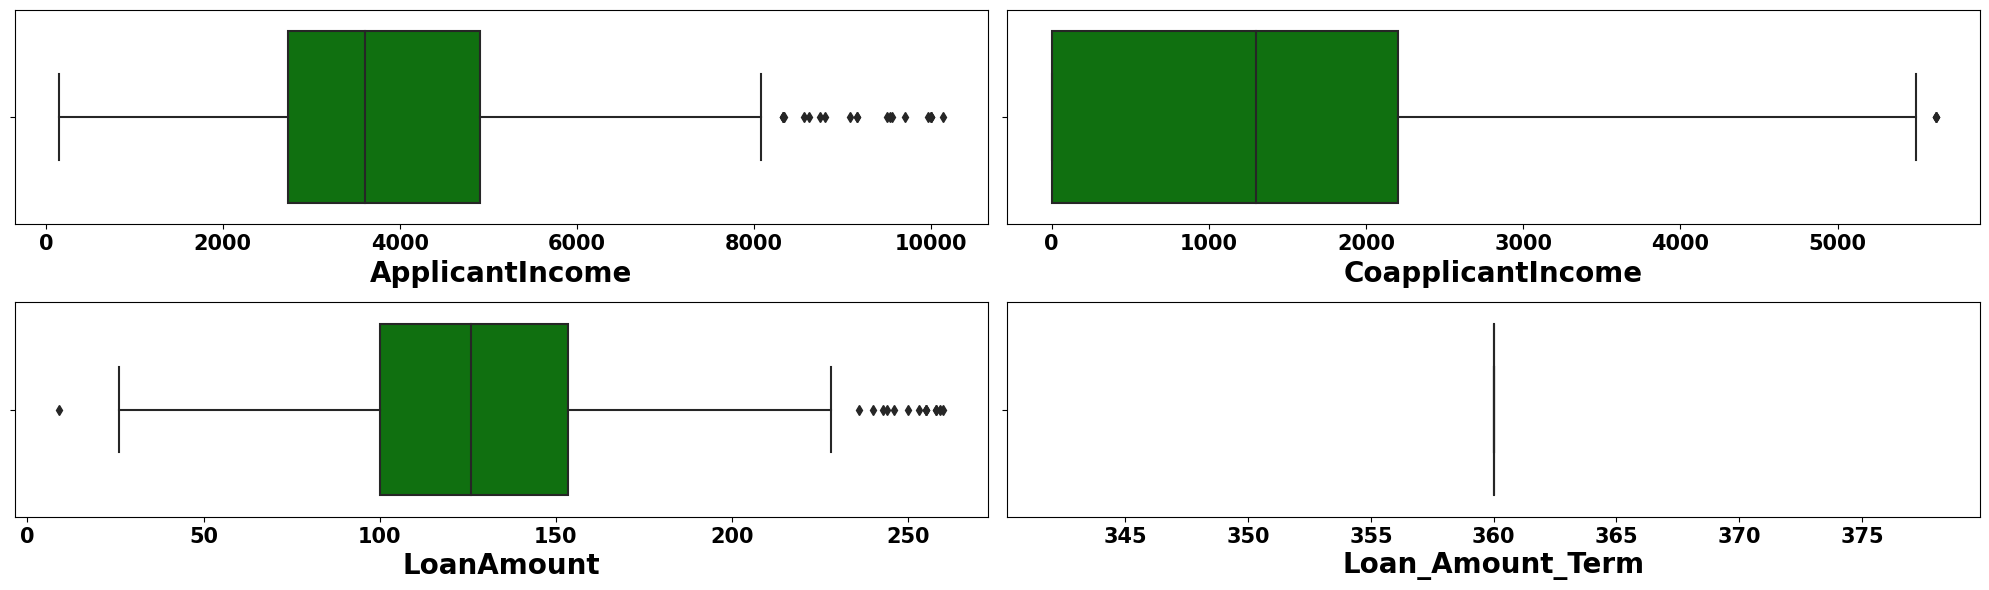

In [77]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

In [78]:
df_2.shape

(459, 10)

In [79]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df.shape[0]-df_2.shape[0])/df.shape[0]*100,1)
display(loss_percent_IQR)

25.2

#### Observations: 
- **Data loss with IQR is 25.2% which is higher than data loss with z-score (6%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [80]:
x=df_1.drop(['Loan_Status'],axis=1)
y=df_1['Loan_Status'].copy()
df=df_1

In [81]:
df=df_1.copy()

# Skewness Check

In [82]:
df_outliers.shape

(614, 4)

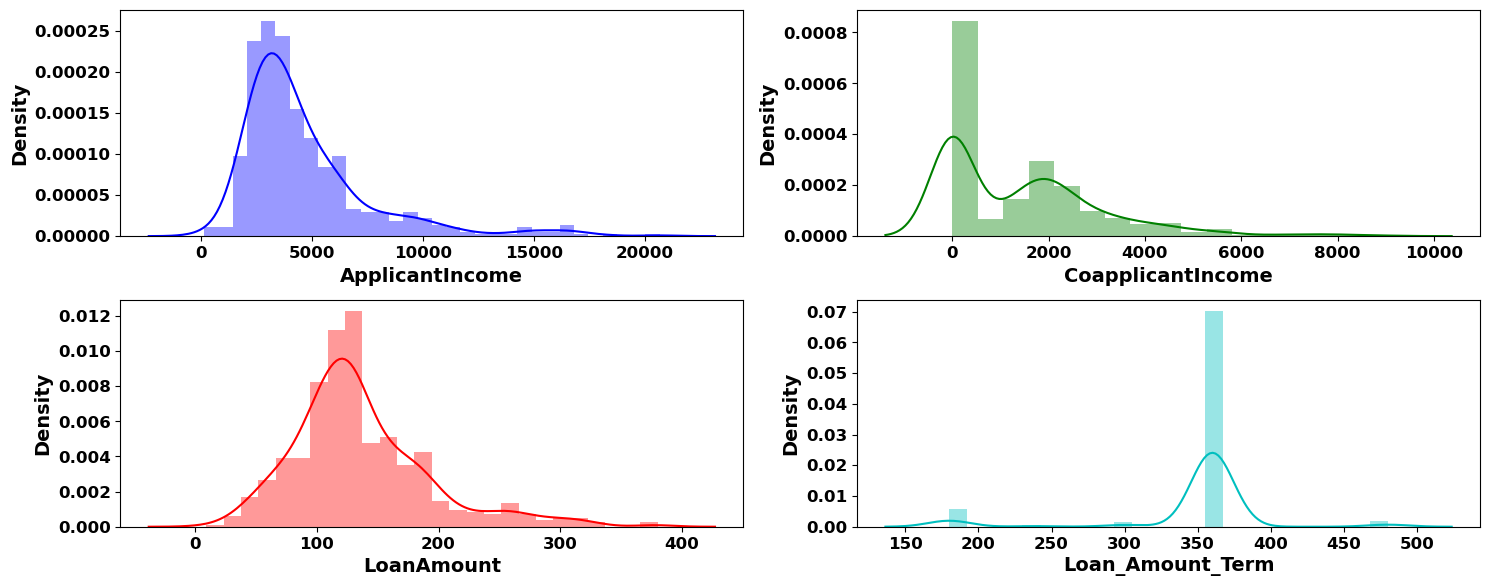

In [83]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_outliers_del.columns:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [84]:
df_outliers_del.skew().sort_values(ascending=False)

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various methods to remove skewness and will consider the one with lowest skewness**

# Transforming data to reduce skewness

In [85]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_outliers_del)
x_tra=pd.DataFrame(data=x_pwr,columns=df_outliers_del.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

Loan_Amount_Term     0.727533
LoanAmount           0.048425
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**

In [86]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_outliers_del)
x_qtr=pd.DataFrame(data=x_qt,columns=df_outliers_del.columns)
x_qtr.skew().sort_values(ascending=False)

CoapplicantIncome    0.047058
ApplicantIncome     -0.000095
LoanAmount          -0.000655
Loan_Amount_Term    -1.486509
dtype: float64

#### Observations:
- **Skewness is reduced with Quantile Transformer as well**
- **Considering power transformer as it gives low skewness compared to qunatile transformer** 

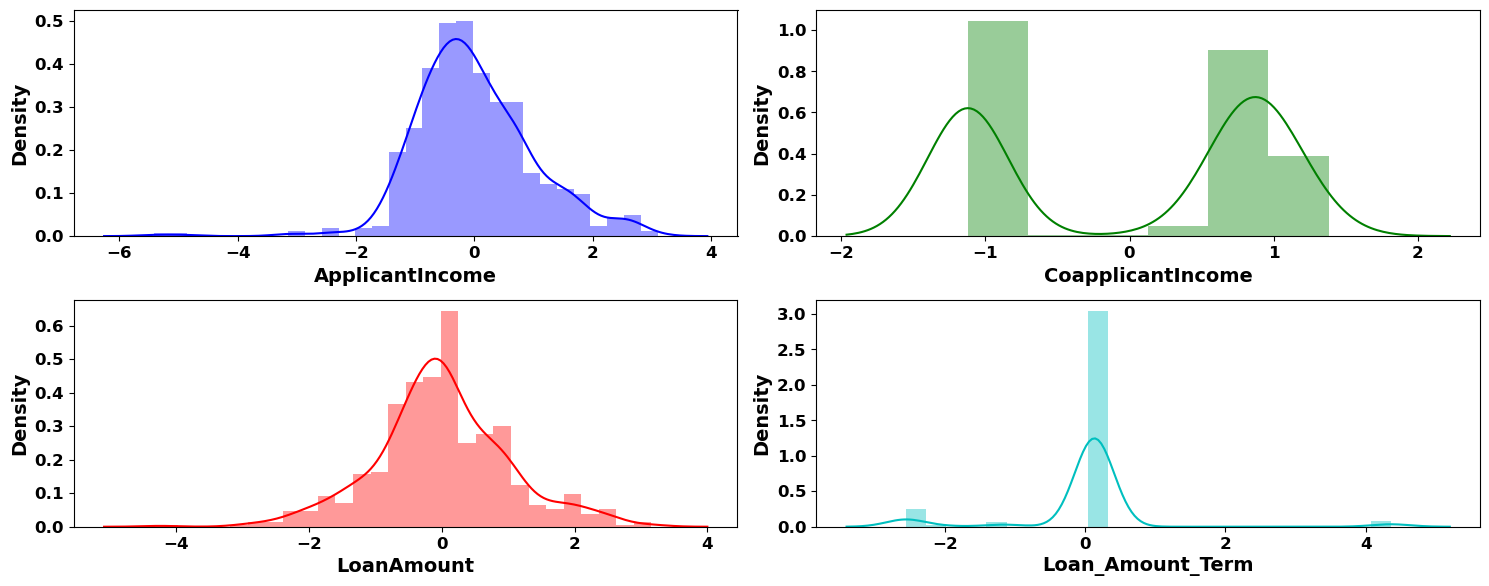

In [87]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_tra:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x_tra[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Grouping both transformed numerical and categorical data 

In [88]:
x.shape

(577, 9)

In [89]:
x.head() # entire x data including both numerical and categorical features

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,0,4583,1508.0,128.0,360.0,1,0
2,1,0,0,3000,0.0,66.0,360.0,1,2
3,1,0,1,2583,2358.0,120.0,360.0,1,2
4,0,0,0,6000,0.0,141.0,360.0,1,2


In [90]:
new_x=x.reset_index(drop=True)  # reset the index of x data

In [91]:
new_x.head() # entire x data including both numerical and categorical features after resetting the index

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,0,4583,1508.0,128.0,360.0,1,0
2,1,0,0,3000,0.0,66.0,360.0,1,2
3,1,0,1,2583,2358.0,120.0,360.0,1,2
4,0,0,0,6000,0.0,141.0,360.0,1,2


In [92]:
x_tra.head()  # Transformed numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.000771,0.130788
1,0.234783,0.744117,0.000771,0.130788
2,-0.527201,-1.122446,-1.437336,0.130788
3,-0.791972,0.895786,-0.153545,0.130788
4,0.728848,-1.122446,0.238260,0.130788


In [93]:
#here transformed numerical data is assigned to original data set
for i in x_tra.columns:
    new_x[i]=x_tra[i]

In [94]:
new_x.head()  # Grouped x data with tranformed numerical data and categorical data

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0.681780,-1.122446,0.000771,0.130788,1,2
1,1,1,0,0.234783,0.744117,0.000771,0.130788,1,0
2,1,0,0,-0.527201,-1.122446,-1.437336,0.130788,1,2
3,1,0,1,-0.791972,0.895786,-0.153545,0.130788,1,2
4,0,0,0,0.728848,-1.122446,0.238260,0.130788,1,2


In [95]:
new_x.shape

(577, 9)

In [96]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

# Scaling data

In [97]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.362511,-0.723313,-0.541961,0.681780,-1.122446,0.000771,0.130788,0.418513,1.227472
1,0.733939,0.282353,-0.541961,0.234783,0.744117,0.000771,0.130788,0.418513,-1.306522
2,0.733939,-0.723313,-0.541961,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.227472
3,0.733939,-0.723313,1.845150,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.227472
4,-1.362511,-0.723313,-0.541961,0.728848,-1.122446,0.238260,0.130788,0.418513,1.227472


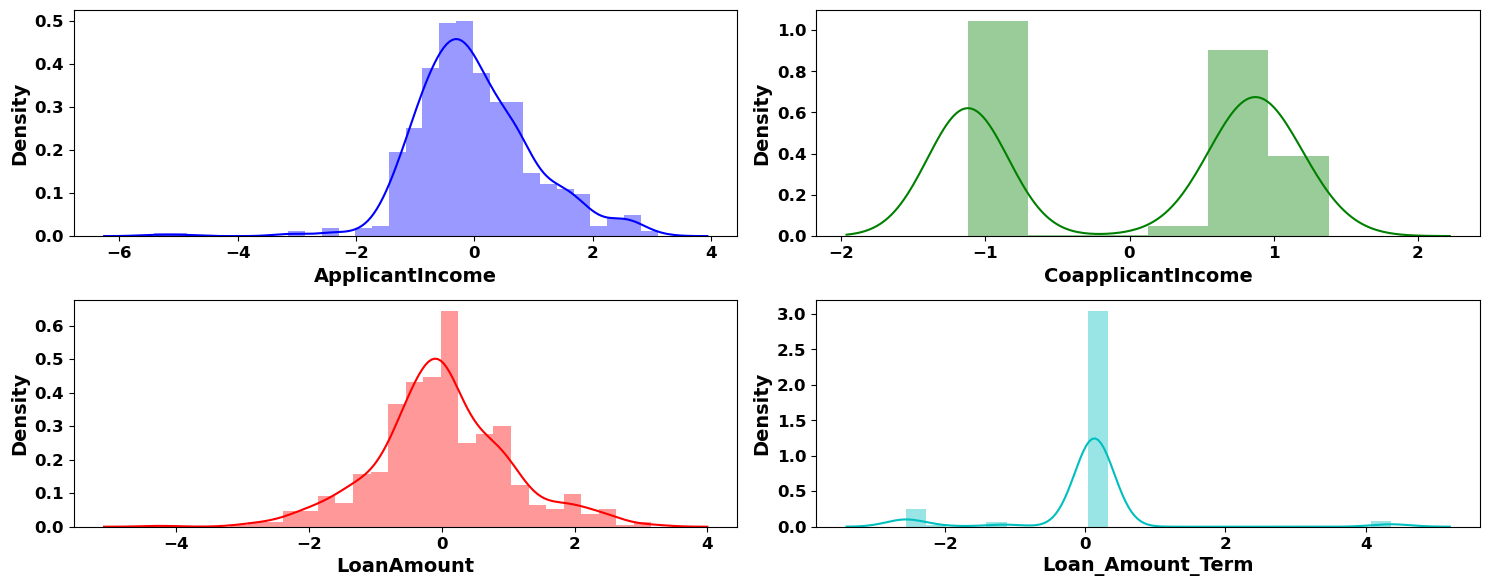

In [98]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_tra:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

# SMOTE for classfication

- **As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable**

In [99]:
# Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [100]:
x.shape

(577, 9)

In [101]:
y.shape

(577,)

In [102]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [103]:
# Checking the value count of target column
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [104]:
x.shape

(796, 9)

In [105]:
y.shape

(796,)

1    398
0    398
Name: Loan_Status, dtype: int64


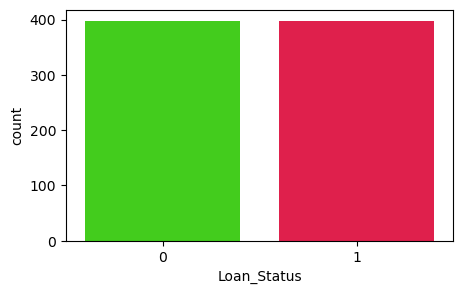

In [106]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

#### Observations: 
- **Classes are balanced in the target column**

# Model Building - Binary Classification

In [136]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

### Finding Best Random State

Best random state: 11, Best accuracy: 81.88


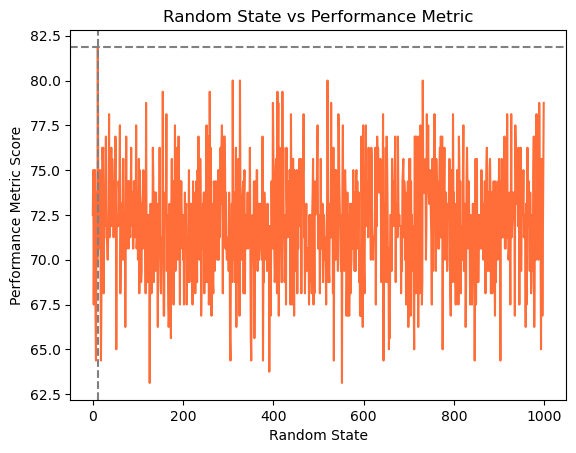

In [107]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, classification_report, roc_curve


lr=LogisticRegression()  # Defining instance for logisticregression

# Initialize empty lists for storing the random state values and the performance metric scores
random_states = []
scores = []

# Split the data into train and test sets for different random states
best_score = 0
best_random_state = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i,stratify=y)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    # Append the random state value and the performance metric score to the lists
    random_states.append(i)
    scores.append(score*100)
    if score > best_score:
        best_score = score
        best_random_state = i

print(f"Best random state: {best_random_state}, Best accuracy: {round((best_score*100),2)}")

# Plot the line chart
plt.plot(random_states, scores)
plt.xlabel('Random State')
plt.ylabel('Performance Metric Score')
plt.title('Random State vs Performance Metric')
# Add dashed lines
plt.axhline(y=max(scores), linestyle='--', color='gray')
plt.axvline(best_random_state, linestyle='--', color='gray')
plt.show()

In [108]:
# Best Random State
BRS=best_random_state
BRS

11

#### Observations: 
- **From the above plot, best random state is 11 where testing accuracy is high. This random state will be used for buidling all classification models**

In [109]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS,stratify=y)

In [110]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
y_prob = lr.predict_proba(x_test)

accu_score=accuracy_score(y_test,pred_test)
print("Accuracy Score:",round(accuracy_score(y_test,pred_test)*100,1))
f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

Accuracy Score: 81.9
F1 Score: 81.7
Precision Score: 83.4
Recall Score: 81.9
ROC AUC Score: 86.5
AUC PR Score: 78.8


In [111]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.90      0.71      0.80        80
           1       0.76      0.93      0.84        80

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160



In [112]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[57 23]
 [ 6 74]]


# Cross Validation for Logistic Regression

- **Finding the best no. folds where the delta is least between cross validation and model scores.**

Model score: 81.8750
CV score with 2 folds: 72.7387
CV score with 3 folds: 72.2348
CV score with 4 folds: 71.3568
CV score with 5 folds: 71.6116
CV score with 6 folds: 71.9849
CV score with 7 folds: 71.7324
CV score with 8 folds: 71.9836
CV score with 9 folds: 71.8548
CV score with 10 folds: 71.3576
Best number of folds: 2


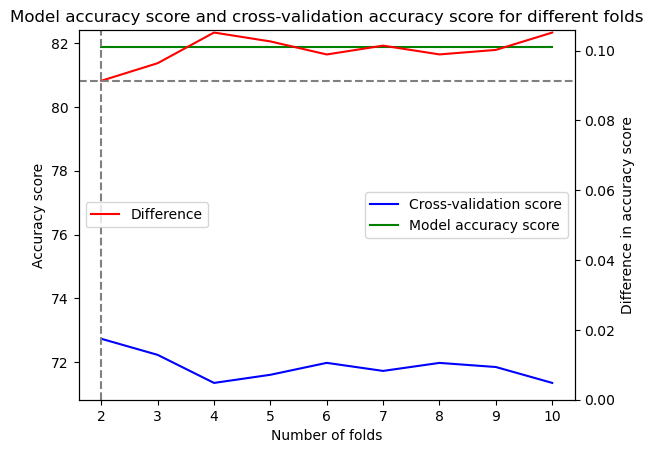

In [113]:
from sklearn.model_selection  import cross_val_score

pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

folds_range = range(2, 11)

for j in folds_range:
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))

# Find the best number of folds based on smallest difference between cross-validation score and model score

best_n_folds = folds_range[np.argmin(Difference)]

# Print the results
print("Model score: {:.4f}".format(lss*100))
for n_folds, cv_score in zip(folds_range, CV_Score):
    print("CV score with {} folds: {:.4f}".format(n_folds, cv_score))
print("Best number of folds: {}".format(best_n_folds))

# plot cross-validation scores and model scores for each number of folds
fig, ax1 = plt.subplots()
ax1.plot(No_of_Folds, CV_Score, label='Cross-validation score', color='blue')
ax1.plot(No_of_Folds, Model_Score, label='Model accuracy score', color='green')
ax1.set_xlabel('Number of folds')
ax1.set_ylabel('Accuracy score')

ax2 = ax1.twinx()
ax2.plot(No_of_Folds, Difference, label='Difference', color='red')
ax2.set_ylabel('Difference in accuracy score')
ax2.set_ylim(bottom=0)

# Add dashed lines
ax1.axvline(best_n_folds, linestyle='--', color='gray')
ax2.axhline(min(Difference), linestyle='--', color='gray')

plt.title('Model accuracy score and cross-validation accuracy score for different folds')
ax1.legend(loc='center right')
ax2.legend(loc='center')
plt.legend(['Difference'], loc='center left')
plt.show()

In [114]:
# Getting the best no. of folds where the least difference between cross validation score and model score
BCV=best_n_folds
BCV

2

#### Observations: 
- **Considered the no. folds where the delta is least between cross validation and model scores. In this case, selected CV=2**

In [115]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore = cross_val_score(lr, x, y, cv=BCV)
lsscore_selected = lsscore.mean()

print("CV accuracy scores for each fold are: ", lsscore*100)
print("Mean CV accuracy score:", round(lsscore_selected*100,1))
print("Model accuracy score:", round(lss*100,1))
print("Difference in Accuracy Scores:", round(lss-lsscore_selected,5))

f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [72.86432161 72.61306533]
Mean CV accuracy score: 72.7
Model accuracy score: 81.9
Difference in Accuracy Scores: 0.09136
F1 Score: 81.7
Precision Score: 83.4
Recall Score: 81.9
ROC AUC Score: 86.5
AUC PR Score: 78.8


# Other Classification Algorithms

In [116]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier(loss='log')),
        ('SVC()',SVC(probability=True)),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining empty lists
Model=[lr]
CV_Score=[round(lsscore_selected*100,1)]
Model_Score=[round(lss*100,1)]
Difference=[abs(lss-lsscore_selected)]
F1_Scores=[round(f1_Score_sel*100,1)]
precision_scores=[round(precision_score_sel*100,1)]
recall_scores=[round(recall_score_sel*100,1)]
roc_auc_scores=[round(roc_auc_score_sel*100,1)]
pr_auc_scores=[round(pr_auc*100,1)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:    
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(round(accuracy_score(y_test,pred_test)*100,1))  # Appending "Accuracy score" to the list
    F1_Scores.append(round(f1_score(y_test,pred_test, average='weighted')*100,1))  # Appending "F1 score" to the list
    precision_scores.append(round(precision_score(y_test,pred_test, average='weighted')*100,1))  # Appending "precision score" to the list
    recall_scores.append(round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Appending "recall score" to the list
    
    y_prob = model[1].predict_proba(x_test)
    roc_auc_scores.append(round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))  # Appending "roc auc score" to the list
    pr_auc_scores.append(round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))  # Appending "auc pr score" to the list
    
    print('\n')
    print('\033[1m'+'Metrics for Model:', model[0], ':'+'\033[0m\n')
    print("Accuracy Score:", round(accuracy_score(y_test,pred_test)*100,1))               # Printing "accuracy_score"
    print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))        # Printing "f1_score"
    print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1)) # Printing "precision_score"
    print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Printing "recall_score"
    print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1)) # Printing "roc auc_score"
    print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1)) # Printing "auc_pr_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*80)    

    cvscore=cross_val_score(model[1],x,y,cv=BCV)               # Cross Validation score calculation for all folds
    score = cvscore.mean()                                     # Cross Validation mean score calculation      
    
    print('\033[1m'+'Cross Validation Score for Model:', model[0], ':'+'\033[0m\n')
    print("CV accuracy scores for each fold are: ", cvscore*100)
    print("Mean CV accuracy score:", round(score*100,1))
    print('\n')
    print('='*80)
    
    CV_Score.append(round(score*100,1))                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences

# Create a Pandas DataFrame to display the scores for each model
scores_df = pd.DataFrame({'Model': Model,
                          'Accuracy': Model_Score,
                          'CV score': CV_Score,
                          'F1-score': F1_Scores,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'AUC-ROC': roc_auc_scores,
                          'AUC-PR': pr_auc_scores,
                          'Difference in Accuracy Scores':Difference})

print("Table with performance of the models")
scores_df.sort_values(by=["Accuracy"],ascending=False)  # sorting the score table using the model score



Metrics for Model: GaussianNB() :

Accuracy Score: 80.0
F1 Score: 79.5
Precision Score: 83.5
Recall Score: 80.0
ROC AUC Score: 83.5
AUC PR Score: 74.6
Confusion Matrix:
[[51 29]
 [ 3 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76        80
           1       0.73      0.96      0.83        80

    accuracy                           0.80       160
   macro avg       0.84      0.80      0.79       160
weighted avg       0.84      0.80      0.79       160

--------------------------------------------------------------------------------
Cross Validation Score for Model: GaussianNB() :

CV accuracy scores for each fold are:  [72.11055276 72.61306533]
Mean CV accuracy score: 72.4




Metrics for Model: Decision Tree Classifier() :

Accuracy Score: 85.6
F1 Score: 85.6
Precision Score: 85.8
Recall Score: 85.6
ROC AUC Score: 85.6
AUC PR Score: 81.4
Confusion Matrix:
[[71  9]
 [14 66]]
Classification Report:
      

Cross Validation Score for Model: XGBClassifier() :

CV accuracy scores for each fold are:  [75.12562814 79.14572864]
Mean CV accuracy score: 77.1


Table with performance of the models


,Model,Accuracy,CV score,F1-score,Precision,Recall,AUC-ROC,AUC-PR,Difference in Accuracy Scores
6,RandomForestClassifier(),88.8,79.8,88.7,89.1,88.8,95.6,93.4,0.089761
7,ExtraTreesClassifier(),88.8,81.8,88.7,88.8,88.8,94.8,91.5,0.069661
10,XGBClassifier(),86.2,77.1,86.2,86.2,86.2,92.5,91.3,0.091143
2,Decision Tree Classifier(),85.6,72.5,85.6,85.8,85.6,85.6,81.4,0.131376
3,KNeighborsClassifier(),84.4,73.9,84.4,84.5,84.4,90.3,86.4,0.105057
8,GradientBoostingClassifier(),82.5,73.7,82.4,83.2,82.5,89.2,86.6,0.087563
0,LogisticRegression(),81.9,72.7,81.7,83.4,81.9,86.5,78.8,0.091363
5,SVC(),81.2,73.6,80.9,83.8,81.2,89.7,87.0,0.076319
9,AdaBoostClassifier(),80.6,73.2,80.5,81.2,80.6,86.8,83.3,0.073838
1,GaussianNB(),80.0,72.4,79.5,83.5,80.0,83.5,74.6,0.076382


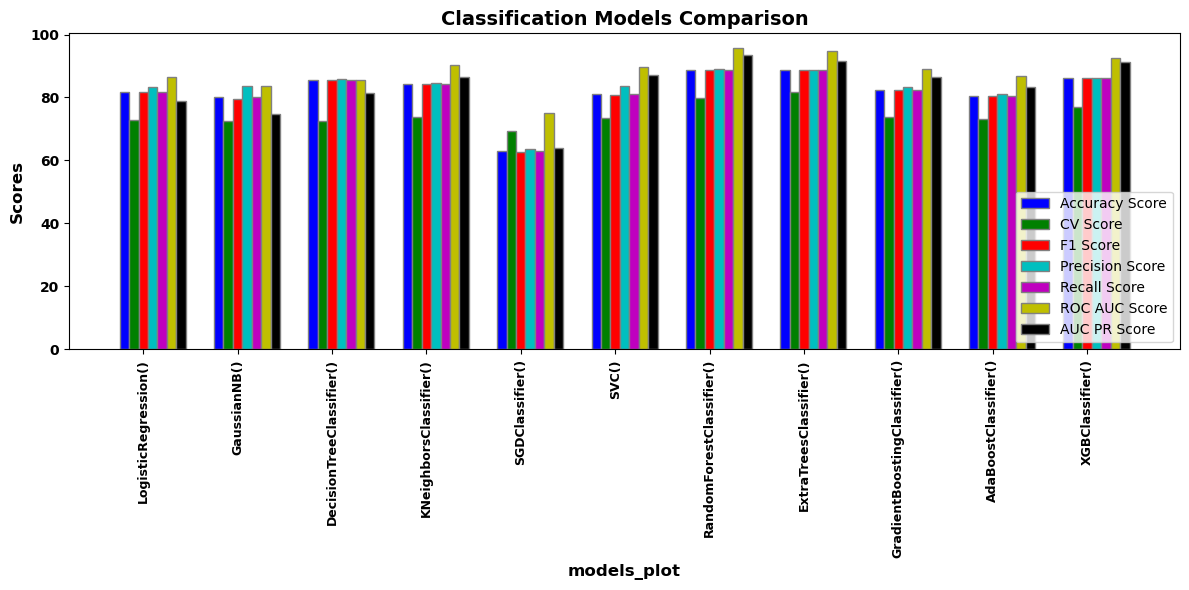

In [117]:
# Plotting all models_plot metrics
models_plot = ['LogisticRegression()','GaussianNB()','DecisionTreeClassifier()','KNeighborsClassifier()','SGDClassifier()',
               'SVC()','RandomForestClassifier()','ExtraTreesClassifier()','GradientBoostingClassifier()','AdaBoostClassifier()',
               'XGBClassifier()']

barWidth = 0.1 # set width of bars

# set heights of bars
accu_bar = Model_Score
cv_bar = CV_Score
f1_bar = F1_Scores
precision_bar = precision_scores
recall_bar = recall_scores
roc_auc_bar = roc_auc_scores
pr_auc_bar = pr_auc_scores

# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]
pos6 = [x + barWidth for x in pos5]
pos7 = [x + barWidth for x in pos6]

# define colors for each bar
#colors = ['crimson','blue','green', 'yellow', 'magenta']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(12,6))

# create bar plots with defined colors
ax.bar(pos1, accu_bar, color=colors[0], width=barWidth, edgecolor='grey', label='Accuracy Score')
ax.bar(pos2, cv_bar, color=colors[1], width=barWidth, edgecolor='grey', label='CV Score')
ax.bar(pos3, f1_bar, color=colors[2], width=barWidth, edgecolor='grey', label='F1 Score')
ax.bar(pos4, precision_bar, color=colors[3], width=barWidth, edgecolor='grey', label='Precision Score')
ax.bar(pos5, recall_bar, color=colors[4], width=barWidth, edgecolor='grey', label='Recall Score')
ax.bar(pos6, roc_auc_bar, color=colors[5], width=barWidth, edgecolor='grey', label='ROC AUC Score')
ax.bar(pos7, pr_auc_bar, color=colors[6], width=barWidth, edgecolor='grey', label='AUC PR Score')


# add labels and title
plt.title('Classification Models Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
# plt.legend()
plt.legend(fontsize='10', title_fontsize='10',loc="lower right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations: 
- **We can see that RandomForestClassifier() and ExtraTreesClassifier() gives us maximum Accuracy score, max f1 score and max scores for remaining metrics along with max cross-validation score compared to remaining models.**
- **Out of RandomForestClassifier() and ExtraTreesClassifier(), ExtraTreesClassifier() gives more cross-validation score eventhough accuracy scores are same. Hence selected ExtraTreesClassifier() as the best model for Hyper Parameter Tuning**
- **Hyper parameter tuning will be pefromed for "ExtraTreesClassifier()**

## Hyper Parameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200,300]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [None,2,3,4,5,7,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [119]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [120]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Model Accuracy Score:")
print(round(acc*100,1))
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print("Classification Report:")
print(classification_report(y_test,pred))

Model Accuracy Score:
90.6
Confusion Matrix:
[[70 10]
 [ 5 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        80
           1       0.88      0.94      0.91        80

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160



In [121]:
# Using best CV value and checking the cross validation score again to compare with model score
cvscores = cross_val_score(ht_model, x, y, cv=BCV)
score = cvscores.mean()
ms=accuracy_score(y_test,pred)
y_prob = ht_model.predict_proba(x_test)

print("CV accuracy scores for each fold are: ", cvscores*100)
print("Mean CV accuracy score:", round(score*100,1))
print("Model accuracy score:", round(ms*100,1))
print("Difference in Accuracy Scores:", round(ms-score,5))
print("F1 Score:",round(f1_score(y_test,pred, average='weighted')*100,1))
print("Precision Score:",round(precision_score(y_test,pred, average='weighted')*100,1))
print("Recall Score:",round(recall_score(y_test,pred, average='weighted')*100,1))
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [80.15075377 82.91457286]
Mean CV accuracy score: 81.5
Model accuracy score: 90.6
Difference in Accuracy Scores: 0.09092
F1 Score: 90.6
Precision Score: 90.8
Recall Score: 90.6
ROC AUC Score: 95.3
AUC PR Score: 92.8


### Observations for Hyper Parameter Tuning: 
- **Accuracy Score, F1 score and remainig metrics and Cross-validation score for the model with hyper parameters tuned is better than the model with default Parameters for ExtraTreesClassifier, hence considered the final model with hyper parameters tuned for saving**

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

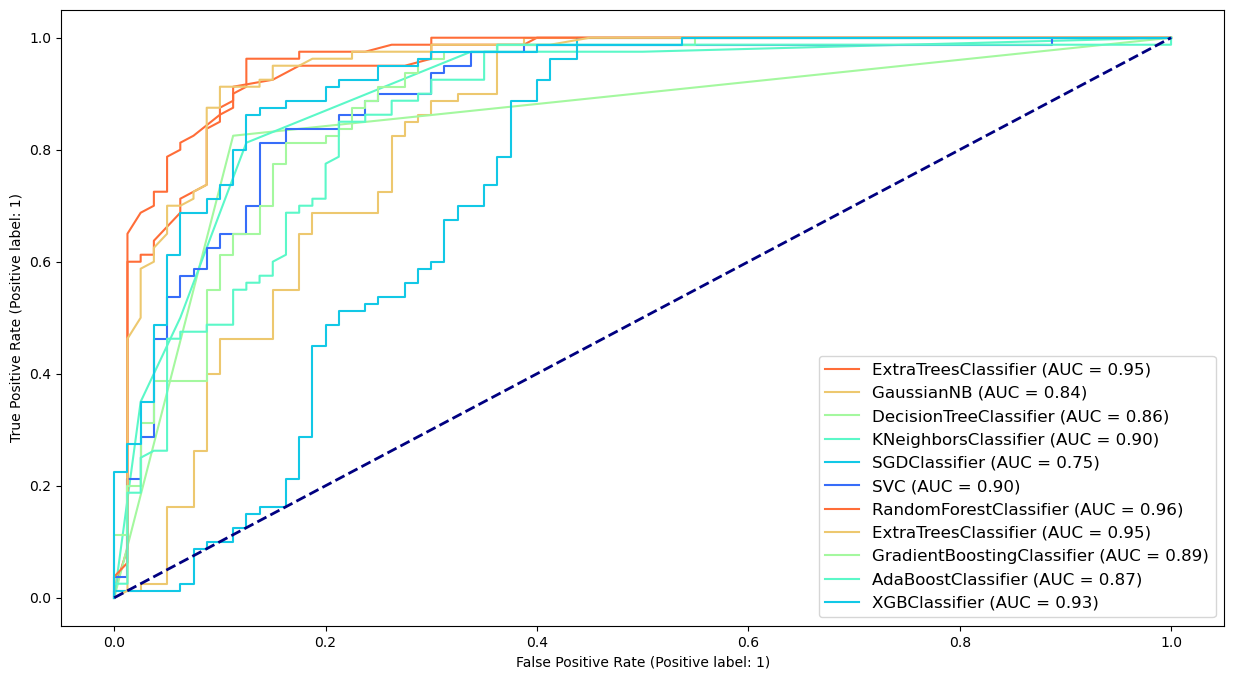

In [122]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 8)) # Set the figure size to 10 inches by 10 inches

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for Extra Trees Classifier which is best model identified so far
disp = plot_roc_curve(ht_model, x_test, y_test, ax=ax)

# Plotting the AUC ROC curve for remaining models with same axis of Extra Trees Classifier
plot_roc_curve(models[0][1], x_test, y_test, ax=ax)
plot_roc_curve(models[1][1], x_test, y_test, ax=ax)
plot_roc_curve(models[2][1], x_test, y_test, ax=ax)
plot_roc_curve(models[3][1], x_test, y_test, ax=ax)
plot_roc_curve(models[4][1], x_test, y_test, ax=ax)
plot_roc_curve(models[5][1], x_test, y_test, ax=ax)
plot_roc_curve(models[6][1], x_test, y_test, ax=ax)
plot_roc_curve(models[7][1], x_test, y_test, ax=ax)
plot_roc_curve(models[8][1], x_test, y_test, ax=ax)
plot_roc_curve(models[9][1], x_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(prop={'size': 12}, loc='lower right')
plt.show()

#### Observations:
- **Many models are performing well.**
- **ExtraTreesClassifier, RandomForestClassifier and XGBClassifier are the best one among all models from this plot based on AUC ROC score** 
- **ExtraTreesClassifier from hyper parameter tuning is selected as the final model for deployment based on checking of all the metrics (Model Accuracy Score, cross validation score, F1 Score, Recall Score, Precision Score and ROC AUC Score)**

# Model Saving

In [123]:
import pickle
filename='Loan-Prediction.pkl'
pickle.dump(ht_model, open(filename,'wb'))  # saving the Extra Trees Classifier model

# Conclusion

In [124]:
loaded_model=pickle.load(open('Loan-Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Score:",result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head()

Model Score: 90.625


,Predicted,Original
0,1,1
1,1,1
2,0,0
3,1,0
4,1,1


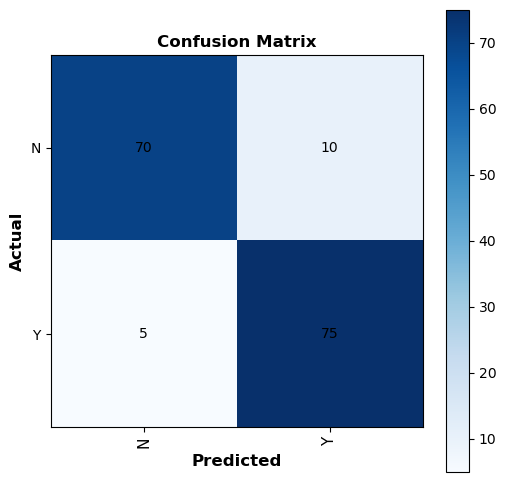

In [125]:
# Confusion Matrix for final saved model
pred=loaded_model.predict(x_test)
cm=confusion_matrix(y_test,pred)

# Target variable labels in the order
classes = ['N', 'Y']

fig, ax = plt.subplots(figsize=(6, 6)) # create a figure and axis object
im = ax.imshow(cm, cmap='Blues')  # create a heatmap of the confusion matrix

# set axis labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xticks(fontsize=11,rotation=90)

# set labels for each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
ax.set_title("Confusion Matrix",fontsize=12,fontweight ='bold')
ax.set_xlabel('Predicted',fontsize=12,fontweight ='bold')
ax.set_ylabel('Actual',fontsize=12,fontweight ='bold')
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

#### Overall Summary:

- **First I had loaded the dataset and completed the Data Visualization based on the target variable (Loan Status).**

- **Then, I proceeded further with Exploratory Data Analysis and prepared the model for training and testing**

- **Tested multiple classification algorithms including ensemble techniques and based on the values of different metrics, I have considered  ExtraTreesClassifier as the best performing model among all algorithms**

- **After finding out the best model, I tried to increase the score by using Hyperparameter Tuning technique and the score is improved compared to the the model with default paratmeters**

- **The final model is saved as pickle file**